In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import umap


In [2]:
data=pd.read_excel('Data.xlsx')

In [3]:
data

Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
0    Player 1   20   871.76660  0.000000    0.722670           0.000000   
1    Player 2   24   896.01666  0.100445    0.401778           0.100445   
2    Player 3   29  2382.05030  0.037783    0.453391           0.037783   
3    Player 4   27   701.20010  0.128351    0.898460           0.128351   
4    Player 5   27   707.71670  0.127170    1.271695           0.127170   
5    Player 6   23  2221.95020  0.040505    0.445555           0.040505   
6    Player 7   26  1144.13340  0.078662    0.629297           0.078662   
7    Player 8   28  1072.53360  0.167827    0.923048           0.167827   
8    Player 9   21  2199.98340  0.081819    0.654550           0.081819   
9   Player 10   22   629.46670  0.000000    0.857869           0.000000   
10  Player 11   26  2885.08350  0.093585    1.029433           0.093585   
11  Player 12   29  1913.41660  0.047036    0.658508           0.047036   
12  Player 13   30  1267.83340  0.000000    0.638885           0.000000   
13  Player 14   19  1615.80000  0.055700    0.501300           0.055700   
14  Player 15   24  2006.70000  0.089700    0.672746           0.089700   
15  Player 16   35  1895.10000  0.237455    1.424727           0.237455   
16  Player 17   28  2535.06670  0.035502    0.568032           0.035502   
17  Player 18   27  2458.03340  0.036615    0.366146           0.036615   
18  Player 19   31  1231.28340  0.000000    0.584756           0.000000   
19  Player 20   29  1981.79990  0.045413    0.772026           0.045413   
20  Player 21   30  1943.19980  0.092631    1.157884           0.092631   
21  Player 22   18   704.31660  0.127783    0.511134           0.127783   
22  Player 23   23   626.66660  0.000000    0.574468           0.000000   
23  Player 24   24   639.76670  0.000000    0.422029           0.000000   
24  Player 25   23  1187.13330  0.000000    0.682316           0.000000   
25  Player 26   28   933.24994  0.192874    0.675060           0.192874   
26  Player 27   32  2160.10000  0.000000    0.416647           0.000000   
27  Player 28   32  1665.81700  0.108055    0.810413           0.108055   
28  Player 29   27   918.55000  0.000000    1.175766           0.000000   
29  Player 30   33   794.53345  0.113274    0.566370           0.113274   
30  Player 31   29  1760.64990  0.102235    0.460057           0.102235   
31  Player 32   20  2038.50010  0.220751    0.971302           0.220751   
32  Player 33   28  2342.84990  0.345733    1.728664           0.230489   
33  Player 34   35   608.65010  0.000000    1.182946           0.000000   
34  Player 35   29  2292.56640  0.078515    0.235544           0.078515   
35  Player 36   29   705.66670  0.255078    1.530468           0.255078   
36  Player 37   31  1304.26660  0.207013    0.759047           0.207013   
37  Player 38   31   857.25000  0.104987    0.839895           0.104987   
38  Player 39   28  2952.64970  0.121924    0.731546           0.121924   
39  Player 40   20  1645.13330  0.000000    0.711189           0.000000   
40  Player 41   26  1781.04990  0.050532    0.252660           0.050532   
41  Player 42   29  2388.73320  0.226061    1.394044           0.226061   
42  Player 43   29  1212.76660  0.000000    0.742105           0.000000   
43  Player 44   23  1570.58310  0.114607    0.630339           0.114607   
44  Player 45   34  1523.93330  0.118115    0.944923           0.118115   
45  Player 46   21   908.68335  0.000000    0.198089           0.000000   
46  Player 47   33  1594.86670  0.056431    0.790035           0.056431   
47  Player 48   31  2208.81670  0.081492    1.303866           0.081492   
48  Player 49   19  1056.61670  0.170355    0.596243           0.170355   
49  Player 50   28  1603.61660  0.112246    0.617355           0.112246   
50  Player 51   24  1458.98340  0.185060    0.925302           0.185060   
51  Player 52   25  1373.21670  0.131079    1.114172           0.131079   
52  Player 53   21  1387.78310  

In [4]:
data.columns

Index(['Player', 'Age', 'Minutes', 'Assists', 'Key Passes',
       'Open Play Assists', 'Open Play Key Passes', 'Open Play xG Assisted',
       'xG Assisted', 'Dispossessed [1]', 'Dribble%', 'Dribbles', 'Fouls Won',
       'Penalty wins', 'Successful Dribbles', 'Turnovers [2]',
       'Over/Underperformance [3]', 'Goal Conversion% [4]',
       'Non-Penalty Goals', 'Post Shot xG [5]', 'Shooting% [6]', 'Shots',
       'Shot Touch% [7]', 'xG', 'xG/Shot', 'Aggressive Actions [8]',
       'Aerial Win%', 'Aerial Wins', 'Counterpressure Regains',
       'Counterpressures', 'PAdj Pressures', 'Pressure Regains', 'Pressures',
       'Crossing% [10]', 'Deep Completions [11]',
       'Open Play Final Third Passes', 'OP Passes Into Box',
       'Passes Inside Box', 'Passes Into Box', 'Successful Crosses',
       'Throughballs', 'Touches In Box', 'Carries', 'Carry% [12]',
       'Carry Length', 'Deep Progressions [13]', 'xGBuildup [14]',
       'xGChain [15]', 'Final Third Pass Backward%',
       'F

In [5]:
len(data.columns)

64

# The Age factor is really important so it's necessary to encode it from 3 to 1 as younger players should get a higher score than the ones past their primes.

In [6]:
# define the encoding function
def encode_age(age):
    if age <= 24:
        return 3
    elif age <= 29:
        return 2
    else:
        return 1

# apply the encoding function to the Age column and create a new column with the encoded values
data['Age_Encoded'] = data['Age'].apply(encode_age)

# print the updated DataFrame
data

Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
0    Player 1   20   871.76660  0.000000    0.722670           0.000000   
1    Player 2   24   896.01666  0.100445    0.401778           0.100445   
2    Player 3   29  2382.05030  0.037783    0.453391           0.037783   
3    Player 4   27   701.20010  0.128351    0.898460           0.128351   
4    Player 5   27   707.71670  0.127170    1.271695           0.127170   
5    Player 6   23  2221.95020  0.040505    0.445555           0.040505   
6    Player 7   26  1144.13340  0.078662    0.629297           0.078662   
7    Player 8   28  1072.53360  0.167827    0.923048           0.167827   
8    Player 9   21  2199.98340  0.081819    0.654550           0.081819   
9   Player 10   22   629.46670  0.000000    0.857869           0.000000   
10  Player 11   26  2885.08350  0.093585    1.029433           0.093585   
11  Player 12   29  1913.41660  0.047036    0.658508           0.047036   
12  Player 13   30  1267.83340  0.000000    0.638885           0.000000   
13  Player 14   19  1615.80000  0.055700    0.501300           0.055700   
14  Player 15   24  2006.70000  0.089700    0.672746           0.089700   
15  Player 16   35  1895.10000  0.237455    1.424727           0.237455   
16  Player 17   28  2535.06670  0.035502    0.568032           0.035502   
17  Player 18   27  2458.03340  0.036615    0.366146           0.036615   
18  Player 19   31  1231.28340  0.000000    0.584756           0.000000   
19  Player 20   29  1981.79990  0.045413    0.772026           0.045413   
20  Player 21   30  1943.19980  0.092631    1.157884           0.092631   
21  Player 22   18   704.31660  0.127783    0.511134           0.127783   
22  Player 23   23   626.66660  0.000000    0.574468           0.000000   
23  Player 24   24   639.76670  0.000000    0.422029           0.000000   
24  Player 25   23  1187.13330  0.000000    0.682316           0.000000   
25  Player 26   28   933.24994  0.192874    0.675060           0.192874   
26  Player 27   32  2160.10000  0.000000    0.416647           0.000000   
27  Player 28   32  1665.81700  0.108055    0.810413           0.108055   
28  Player 29   27   918.55000  0.000000    1.175766           0.000000   
29  Player 30   33   794.53345  0.113274    0.566370           0.113274   
30  Player 31   29  1760.64990  0.102235    0.460057           0.102235   
31  Player 32   20  2038.50010  0.220751    0.971302           0.220751   
32  Player 33   28  2342.84990  0.345733    1.728664           0.230489   
33  Player 34   35   608.65010  0.000000    1.182946           0.000000   
34  Player 35   29  2292.56640  0.078515    0.235544           0.078515   
35  Player 36   29   705.66670  0.255078    1.530468           0.255078   
36  Player 37   31  1304.26660  0.207013    0.759047           0.207013   
37  Player 38   31   857.25000  0.104987    0.839895           0.104987   
38  Player 39   28  2952.64970  0.121924    0.731546           0.121924   
39  Player 40   20  1645.13330  0.000000    0.711189           0.000000   
40  Player 41   26  1781.04990  0.050532    0.252660           0.050532   
41  Player 42   29  2388.73320  0.226061    1.394044           0.226061   
42  Player 43   29  1212.76660  0.000000    0.742105           0.000000   
43  Player 44   23  1570.58310  0.114607    0.630339           0.114607   
44  Player 45   34  1523.93330  0.118115    0.944923           0.118115   
45  Player 46   21   908.68335  0.000000    0.198089           0.000000   
46  Player 47   33  1594.86670  0.056431    0.790035           0.056431   
47  Player 48   31  2208.81670  0.081492    1.303866           0.081492   
48  Player 49   19  1056.61670  0.170355    0.596243           0.170355   
49  Player 50   28  1603.61660  0.112246    0.617355           0.112246   
50  Player 51   24  1458.98340  0.185060    0.925302           0.185060   
51  Player 52   25  1373.21670  0.131079    1.114172           0.131079   
52  Player 53   21  1387.78310  

# As the data contains lots of features it's important to reduce the dimensionality of the dataframe but we can't just apply a reduction technique we need to separate the features and after deep analyzis we separated them into 4 aspects : passing, finishing, dribbling and defending or hardworking abilites and for each aspect we will reduce the number of features to make 2 features representative of each aspect of the game.

# Passes

### We need to get the passing features and separate them from positive and negative as I think personally that the passes sideways and backwards are not a good thing to consider so we will give them a negative score to get an overall score.

In [7]:
passing_features=[ 'Minutes', 'Open Play Assists', 'Key Passes',
       'Open Play Key Passes', 'Open Play xG Assisted',
       'xG Assisted','Crossing% [10]', 'Deep Completions [11]',
       'Open Play Final Third Passes', 'OP Passes Into Box',
       'Passes Inside Box', 'Passes Into Box', 'Successful Crosses',
       'Throughballs', 'Final Third Pass Forward%', 
        'Pass Forward%','Being Pressured Change in Pass%', 'Open Play Passes',
       'Passes Being Pressured%', 'Passing%', 'Pressured Pass%', 'Pass OBV',]
negativep_features=[ 'Final Third Pass Backward%', 'Final Third Pass Sideways%','Pass Backward%', 'Pass Sideways%']
passing = data[passing_features + negativep_features].copy()
passing

Minutes  Open Play Assists  Key Passes  Open Play Key Passes  \
0    871.76660           0.000000    0.722670              0.722670   
1    896.01666           0.100445    0.401778              0.401778   
2   2382.05030           0.037783    0.453391              0.340043   
3    701.20010           0.128351    0.898460              0.898460   
4    707.71670           0.127170    1.271695              1.271695   
5   2221.95020           0.040505    0.445555              0.445555   
6   1144.13340           0.078662    0.629297              0.629297   
7   1072.53360           0.167827    0.923048              0.923048   
8   2199.98340           0.081819    0.654550              0.654550   
9    629.46670           0.000000    0.857869              0.857869   
10  2885.08350           0.093585    1.029433              1.029433   
11  1913.41660           0.047036    0.658508              0.658508   
12  1267.83340           0.000000    0.638885              0.638885   
13  1615.80000           0.055700    0.501300              0.501300   
14  2006.70000           0.089700    0.672746              0.672746   
15  1895.10000           0.237455    1.424727              1.424727   
16  2535.06670           0.035502    0.568032              0.568032   
17  2458.03340           0.036615    0.366146              0.366146   
18  1231.28340           0.000000    0.584756              0.584756   
19  1981.79990           0.045413    0.772026              0.772026   
20  1943.19980           0.092631    1.157884              1.157884   
21   704.31660           0.127783    0.511134              0.511134   
22   626.66660           0.000000    0.574468              0.574468   
23   639.76670           0.000000    0.422029              0.281353   
24  1187.13330           0.000000    0.682316              0.682316   
25   933.24994           0.192874    0.675060              0.675060   
26  2160.10000           0.000000    0.416647              0.416647   
27  1665.81700           0.108055    0.810413              0.810413   
28   918.55000           0.000000    1.175766              1.175766   
29   794.53345           0.113274    0.566370              0.566370   
30  1760.64990           0.102235    0.460057              0.460057   
31  2038.50010           0.220751    0.971302              0.971302   
32  2342.84990           0.230489    1.728664              1.229272   
33   608.65010           0.000000    1.182946              1.182946   
34  2292.56640           0.078515    0.235544              0.235544   
35   705.66670           0.255078    1.530468              1.530468   
36  1304.26660           0.207013    0.759047              0.690043   
37   857.25000           0.104987    0.839895              0.839895   
38  2952.64970           0.121924    0.731546              0.731546   
39  1645.13330           0.000000    0.711189              0.711189   
40  1781.04990           0.050532    0.252660              0.252660   
41  2388.73320           0.226061    1.394044              1.092629   
42  1212.76660           0.000000    0.742105              0.742105   
43  1570.58310           0.114607    0.630339              0.630339   
44  1523.93330           0.118115    0.944923              0.944923   
45   908.68335           0.000000    0.198089              0.198089   
46  1594.86670           0.056431    0.790035              0.790035   
47  2208.81670           0.081492    1.303866              1.303866   
48  1056.61670           0.170355    0.596243              0.596243   
49  1603.61660           0.112246    0.617355              0.617355   
50  1458.98340           0.185060    0.925302              0.925302   
51  1373.21670           0.131079    1.114172              1.114172   
52  1387.78310           0.064852    0.389110              0.389110   
53  1206.56650           0.000000    0.298367              0.298367   
54  1874.45010           0.096028    1.200352              1.200352   
55  1374.21670           0.0654

In [8]:
passing_data=passing

In [9]:
df=data

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# standardize the passing features using z-scores
scaler = StandardScaler()
passing_features_scaled = scaler.fit_transform(data[passing_features + ['Age_Encoded']])
# Scale the negative features using MinMaxScaler, which scales values to a range of [0, 1]
minmax_scaler = MinMaxScaler()
negativep_features_scaled = minmax_scaler.fit_transform(passing[negativep_features])
# Compute the weighted scores
positive_scores = passing_features_scaled.mean(axis=1)
negativep_scores = 1 - negativep_features_scaled.mean(axis=1)
weighted_scores = positive_scores * negativep_scores
df['Passing Score'] = weighted_scores
scaled_features = np.concatenate((passing_features_scaled, negativep_features_scaled, weighted_scores.reshape(-1, 1)), axis=1)

# Apply UMAP for visualization and clustering
umap_embeddings = umap.UMAP().fit_transform(scaled_features)


# add the UMAP embeddings and passing scores to the original DataFrame
df['UMAP_Pass1'] = umap_embeddings[:, 0]
df['UMAP_Pass2'] = umap_embeddings[:, 1]


# sort the DataFrame by passing score in descending order
passing_df = df.sort_values(by='Passing Score', ascending=False)
passing_df

Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
32  Player 33   28  2342.84990  0.345733    1.728664           0.230489   
35  Player 36   29   705.66670  0.255078    1.530468           0.255078   
15  Player 16   35  1895.10000  0.237455    1.424727           0.237455   
41  Player 42   29  2388.73320  0.226061    1.394044           0.226061   
31  Player 32   20  2038.50010  0.220751    0.971302           0.220751   
51  Player 52   25  1373.21670  0.131079    1.114172           0.131079   
8    Player 9   21  2199.98340  0.081819    0.654550           0.081819   
60  Player 61   35  2359.03320  0.076302    0.953781           0.076302   
47  Player 48   31  2208.81670  0.081492    1.303866           0.081492   
63  Player 64   22   863.40000  0.000000    0.938152           0.000000   
37  Player 38   31   857.25000  0.104987    0.839895           0.104987   
50  Player 51   24  1458.98340  0.185060    0.925302           0.185060   
56  Player 57   26  1247.35010  0.144306    1.154447           0.144306   
3    Player 4   27   701.20010  0.128351    0.898460           0.128351   
4    Player 5   27   707.71670  0.127170    1.271695           0.127170   
62  Player 63   23  2357.53320  0.038175    0.687159           0.038175   
44  Player 45   34  1523.93330  0.118115    0.944923           0.118115   
7    Player 8   28  1072.53360  0.167827    0.923048           0.167827   
59  Player 60   33  2181.16670  0.082525    1.237870           0.082525   
10  Player 11   26  2885.08350  0.093585    1.029433           0.093585   
57  Player 58   24  2574.35000  0.174801    0.559364           0.174801   
54  Player 55   26  1874.45010  0.096028    1.200352           0.096028   
36  Player 37   31  1304.26660  0.207013    0.759047           0.207013   
27  Player 28   32  1665.81700  0.108055    0.810413           0.108055   
39  Player 40   20  1645.13330  0.000000    0.711189           0.000000   
19  Player 20   29  1981.79990  0.045413    0.772026           0.045413   
38  Player 39   28  2952.64970  0.121924    0.731546           0.121924   
6    Player 7   26  1144.13340  0.078662    0.629297           0.078662   
42  Player 43   29  1212.76660  0.000000    0.742105           0.000000   
20  Player 21   30  1943.19980  0.092631    1.157884           0.092631   
55  Player 56   25  1374.21670  0.065492    0.851394           0.065492   
33  Player 34   35   608.65010  0.000000    1.182946           0.000000   
58  Player 59   25  2827.53340  0.031830    0.413788           0.031830   
24  Player 25   23  1187.13330  0.000000    0.682316           0.000000   
48  Player 49   19  1056.61670  0.170355    0.596243           0.170355   
14  Player 15   24  2006.70000  0.089700    0.672746           0.089700   
12  Player 13   30  1267.83340  0.000000    0.638885           0.000000   
52  Player 53   21  1387.78310  0.064852    0.389110           0.064852   
17  Player 18   27  2458.03340  0.036615    0.366146           0.036615   
25  Player 26   28   933.24994  0.192874    0.675060           0.192874   
49  Player 50   28  1603.61660  0.112246    0.617355           0.112246   
28  Player 29   27   918.55000  0.000000    1.175766           0.000000   
64  Player 65   25  2245.28320  0.080168    0.721513           0.080168   
18  Player 19   31  1231.28340  0.000000    0.584756           0.000000   
22  Player 23   23   626.66660  0.000000    0.574468           0.000000   
9   Player 10   22   629.46670  0.000000    0.857869           0.000000   
13  Player 14   19  1615.80000  0.055700    0.501300           0.055700   
30  Player 31   29  1760.64990  0.102235    0.460057           0.102235   
16  Player 17   28  2535.06670  0.035502    0.568032           0.035502   
0    Player 1   20   871.76660  0.000000    0.722670           0.000000   
2    Player 3   29  2382.05030  0.037783    0.453391           0.037783   
46  Player 47   33  1594.86670  0.056431    0.790035           0.056431   
26  Player 27   32  2160.10000  

In [11]:
passing_data['Age Encoded'] = data['Age_Encoded']

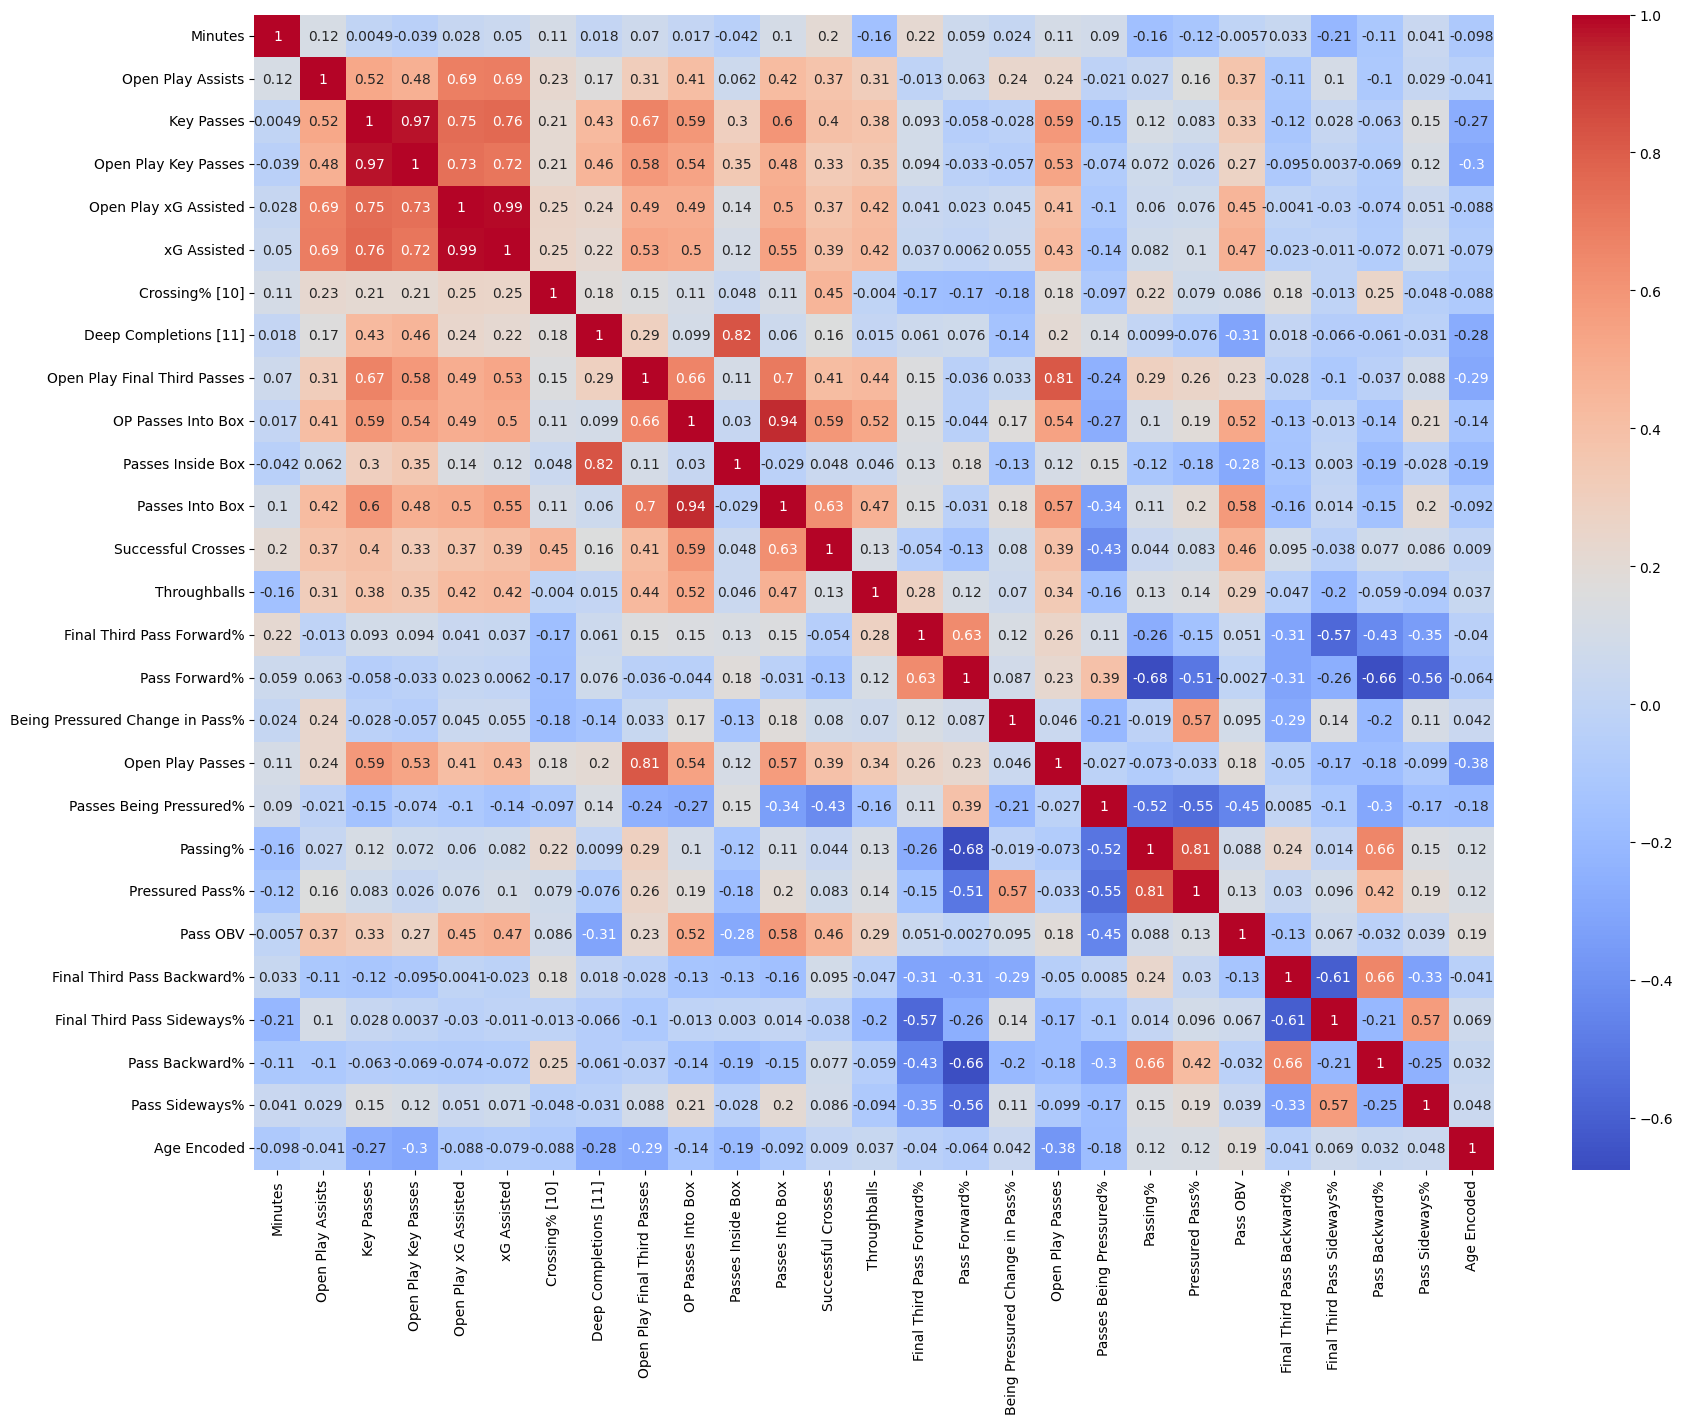

In [12]:
passing_matrix = passing_data.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(passing_matrix, annot=True, cmap='coolwarm')

plt.savefig('edapassing.png',dpi=500,bbox_inches = 'tight')
plt.show()

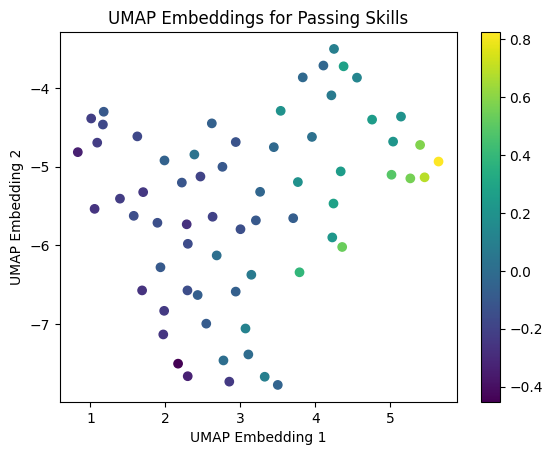

In [13]:
import matplotlib.pyplot as plt

# Create a scatter plot of the UMAP embeddings
plt.scatter(df['UMAP_Pass1'], df['UMAP_Pass2'], c=df['Passing Score'], cmap='viridis')

# Add a colorbar legend to the plot
plt.colorbar()

# Set the axis labels and title of the plot
plt.xlabel('UMAP Embedding 1')
plt.ylabel('UMAP Embedding 2')
plt.title('UMAP Embeddings for Passing Skills')
plt.savefig('umappassing.png',dpi=500,bbox_inches = 'tight')

# Finish

### For finishing I didn't find any negative feature so all are good to consider.

In [14]:
data.columns

Index(['Player', 'Age', 'Minutes', 'Assists', 'Key Passes',
       'Open Play Assists', 'Open Play Key Passes', 'Open Play xG Assisted',
       'xG Assisted', 'Dispossessed [1]', 'Dribble%', 'Dribbles', 'Fouls Won',
       'Penalty wins', 'Successful Dribbles', 'Turnovers [2]',
       'Over/Underperformance [3]', 'Goal Conversion% [4]',
       'Non-Penalty Goals', 'Post Shot xG [5]', 'Shooting% [6]', 'Shots',
       'Shot Touch% [7]', 'xG', 'xG/Shot', 'Aggressive Actions [8]',
       'Aerial Win%', 'Aerial Wins', 'Counterpressure Regains',
       'Counterpressures', 'PAdj Pressures', 'Pressure Regains', 'Pressures',
       'Crossing% [10]', 'Deep Completions [11]',
       'Open Play Final Third Passes', 'OP Passes Into Box',
       'Passes Inside Box', 'Passes Into Box', 'Successful Crosses',
       'Throughballs', 'Touches In Box', 'Carries', 'Carry% [12]',
       'Carry Length', 'Deep Progressions [13]', 'xGBuildup [14]',
       'xGChain [15]', 'Final Third Pass Backward%',
       'F

In [15]:
finishing_features=['Minutes','Non-Penalty Goals', 'xG', 'Post Shot xG [5]','Goal Conversion% [4]','Shots','xG/Shot','Shooting% [6]',  
                    'Shot Touch% [7]', 'Shot OBV', 'xGChain [15]','Touches In Box','Age_Encoded']
finishing = data[finishing_features].copy()
finishing['PsxG Difference']=finishing['Post Shot xG [5]']- finishing['xG']
finishing['Non-Penalty Shots'] = finishing['Non-Penalty Goals'] / (finishing['Goal Conversion% [4]'])
#finishing['Penalty Shots']=finishing['Shots'] - finishing['Non-Penalty Shots']
#precision = 8.578691e-01
#finishing.loc[(finishing['Penalty Shots'] <precision) , 'Penalty Shots'] = 0
finishing['Post-Shot Performance']=finishing['Non-Penalty Goals'] - finishing['Post Shot xG [5]']
finishing.fillna(0, inplace=True)
finishing

Minutes  Non-Penalty Goals        xG  Post Shot xG [5]  \
0    871.76660           0.309716  0.233378          0.213129   
1    896.01666           0.100445  0.239445          0.259936   
2   2382.05030           0.340043  0.301362          0.291102   
3    701.20010           0.000000  0.133916          0.006586   
4    707.71670           0.127170  0.237718          0.154160   
5   2221.95020           0.324040  0.178746          0.197408   
6   1144.13340           0.157324  0.165673          0.186493   
7   1072.53360           0.251740  0.173478          0.192642   
8   2199.98340           0.286366  0.191414          0.252484   
9    629.46670           0.000000  0.049766          0.071367   
10  2885.08350           0.311949  0.287134          0.376794   
11  1913.41660           0.141109  0.170345          0.103532   
12  1267.83340           0.283949  0.212697          0.357400   
13  1615.80000           0.222800  0.256294          0.157056   
14  2006.70000           0.179399  0.205483          0.121328   
15  1895.10000           0.569891  0.372635          0.539341   
16  2535.06670           0.319518  0.277994          0.268992   
17  2458.03340           0.329532  0.347831          0.360840   
18  1231.28340           0.000000  0.127723          0.105250   
19  1981.79990           0.272480  0.367049          0.365872   
20  1943.19980           0.509469  0.461175          0.553238   
21   704.31660           0.255567  0.357936          0.291997   
22   626.66660           0.000000  0.070451          0.089689   
23   639.76670           0.140676  0.160340          0.181131   
24  1187.13330           0.227439  0.252344          0.210953   
25   933.24994           0.385749  0.530332          0.395623   
26  2160.10000           0.333318  0.320208          0.265281   
27  1665.81700           0.378193  0.213364          0.291850   
28   918.55000           0.293942  0.132580          0.145292   
29   794.53345           0.113274  0.174737          0.120691   
30  1760.64990           0.051117  0.181044          0.127605   
31  2038.50010           0.176600  0.204108          0.221314   
32  2342.84990           0.268903  0.153868          0.211025   
33   608.65010           0.147868  0.232624          0.062509   
34  2292.56640           0.157029  0.180324          0.223305   
35   705.66670           0.127539  0.182809          0.024619   
36  1304.26660           0.345021  0.290006          0.391349   
37   857.25000           0.314961  0.307684          0.293173   
38  2952.64970           0.426735  0.357485          0.448966   
39  1645.13330           0.492361  0.431351          0.379515   
40  1781.04990           0.202128  0.158590          0.241003   
41  2388.73320           0.339092  0.310582          0.378039   
42  1212.76660           0.148421  0.194314          0.155466   
43  1570.58310           0.401125  0.342847          0.396855   
44  1523.93330           0.295289  0.348679          0.267000   
45   908.68335           0.099044  0.195228          0.133273   
46  1594.86670           0.169293  0.243311          0.262368   
47  2208.81670           0.244475  0.240900          0.253681   
48  1056.61670           0.511065  0.294592          0.414181   
49  1603.61660           0.224493  0.363948          0.247055   
50  1458.98340           0.493494  0.414376          0.467501   
51  1373.21670           0.196619  0.141064          0.093287   
52  1387.78310           0.064852  0.112861          0.077993   
53  1206.56650           0.298367  0.185743          0.316407   
54  1874.45010           0.384113  0.305075          0.302269   
55  1374.21670           0.261967  0.278761          0.246135   
56  1247.35010           0.505071  0.405369          0.327077   
57  2574.35000           0.349603  0.347359          0.304555   
58  2827.53340           0.190979  0.315413          0.209317   
59  2181.16670           0.206312  0.298770          0.209489   
60  2359.03320           0.038151  0.14777

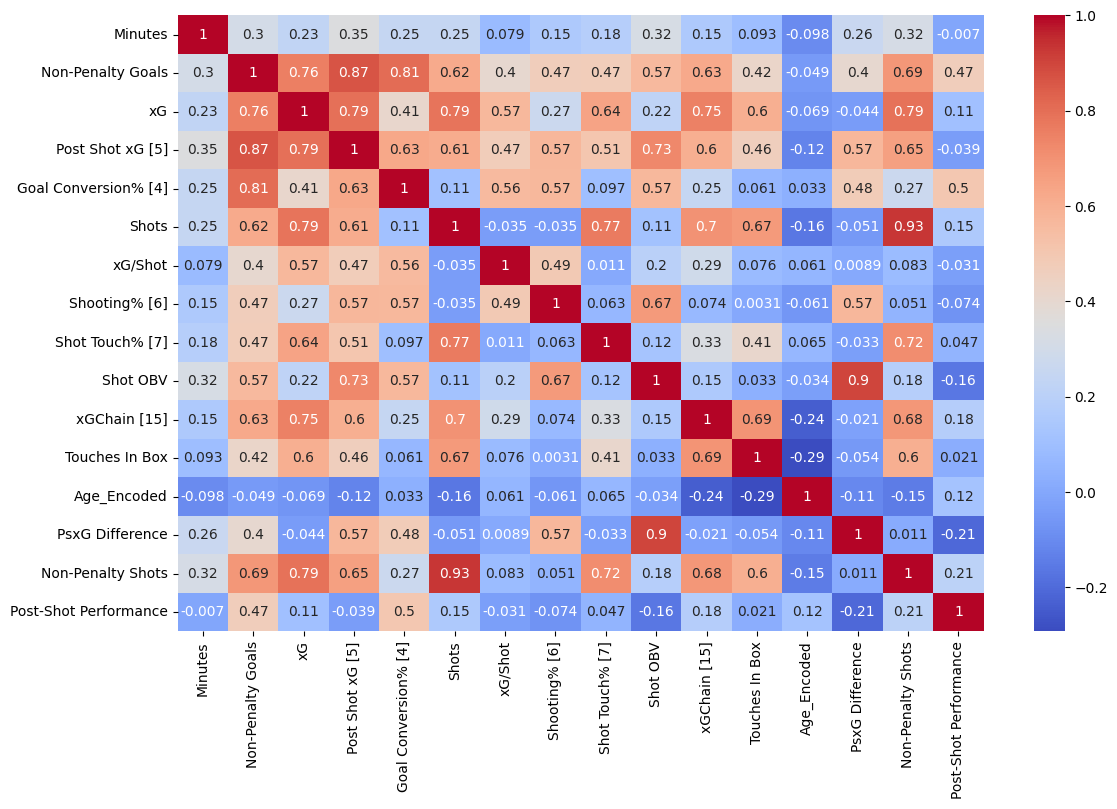

In [16]:
goal_matrix = finishing.corr()
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(goal_matrix, annot=True, cmap='coolwarm')

plt.savefig('edafinishing.png',dpi=500,bbox_inches = 'tight')
plt.show()

In [17]:
scaler = StandardScaler()
finishing_features_scaled = scaler.fit_transform(finishing)
df['Finishing Score'] = finishing_features_scaled.mean(axis=1)
# apply UMAP for visualization and clustering
umap_embeddings = umap.UMAP().fit_transform(finishing_features_scaled+finishing_features_scaled.mean(axis=1).reshape(-1, 1))

# add the UMAP embeddings and finishing scores to the original DataFrame
df['UMAP_Finish1'] = umap_embeddings[:, 0]
df['UMAP_Finish2'] = umap_embeddings[:, 1]


# sort the DataFrame by finishing score in descending order
finishing_df = df.sort_values(by='Finishing Score', ascending=False)
finishing_df

Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
20  Player 21   30  1943.19980  0.092631    1.157884           0.092631   
15  Player 16   35  1895.10000  0.237455    1.424727           0.237455   
50  Player 51   24  1458.98340  0.185060    0.925302           0.185060   
48  Player 49   19  1056.61670  0.170355    0.596243           0.170355   
39  Player 40   20  1645.13330  0.000000    0.711189           0.000000   
38  Player 39   28  2952.64970  0.121924    0.731546           0.121924   
56  Player 57   26  1247.35010  0.144306    1.154447           0.144306   
25  Player 26   28   933.24994  0.192874    0.675060           0.192874   
43  Player 44   23  1570.58310  0.114607    0.630339           0.114607   
54  Player 55   26  1874.45010  0.096028    1.200352           0.096028   
17  Player 18   27  2458.03340  0.036615    0.366146           0.036615   
41  Player 42   29  2388.73320  0.226061    1.394044           0.226061   
57  Player 58   24  2574.35000  0.174801    0.559364           0.174801   
10  Player 11   26  2885.08350  0.093585    1.029433           0.093585   
19  Player 20   29  1981.79990  0.045413    0.772026           0.045413   
2    Player 3   29  2382.05030  0.037783    0.453391           0.037783   
63  Player 64   22   863.40000  0.000000    0.938152           0.000000   
27  Player 28   32  1665.81700  0.108055    0.810413           0.108055   
16  Player 17   28  2535.06670  0.035502    0.568032           0.035502   
36  Player 37   31  1304.26660  0.207013    0.759047           0.207013   
64  Player 65   25  2245.28320  0.080168    0.721513           0.080168   
44  Player 45   34  1523.93330  0.118115    0.944923           0.118115   
37  Player 38   31   857.25000  0.104987    0.839895           0.104987   
5    Player 6   23  2221.95020  0.040505    0.445555           0.040505   
8    Player 9   21  2199.98340  0.081819    0.654550           0.081819   
26  Player 27   32  2160.10000  0.000000    0.416647           0.000000   
47  Player 48   31  2208.81670  0.081492    1.303866           0.081492   
0    Player 1   20   871.76660  0.000000    0.722670           0.000000   
53  Player 54   31  1206.56650  0.000000    0.298367           0.000000   
55  Player 56   25  1374.21670  0.065492    0.851394           0.065492   
58  Player 59   25  2827.53340  0.031830    0.413788           0.031830   
24  Player 25   23  1187.13330  0.000000    0.682316           0.000000   
49  Player 50   28  1603.61660  0.112246    0.617355           0.112246   
12  Player 13   30  1267.83340  0.000000    0.638885           0.000000   
21  Player 22   18   704.31660  0.127783    0.511134           0.127783   
59  Player 60   33  2181.16670  0.082525    1.237870           0.082525   
31  Player 32   20  2038.50010  0.220751    0.971302           0.220751   
32  Player 33   28  2342.84990  0.345733    1.728664           0.230489   
13  Player 14   19  1615.80000  0.055700    0.501300           0.055700   
40  Player 41   26  1781.04990  0.050532    0.252660           0.050532   
1    Player 2   24   896.01666  0.100445    0.401778           0.100445   
34  Player 35   29  2292.56640  0.078515    0.235544           0.078515   
7    Player 8   28  1072.53360  0.167827    0.923048           0.167827   
46  Player 47   33  1594.86670  0.056431    0.790035           0.056431   
6    Player 7   26  1144.13340  0.078662    0.629297           0.078662   
42  Player 43   29  1212.76660  0.000000    0.742105           0.000000   
65  Player 66   31  1469.63320  0.000000    0.489918           0.000000   
28  Player 29   27   918.55000  0.000000    1.175766           0.000000   
23  Player 24   24   639.76670  0.000000    0.422029           0.000000   
51  Player 52   25  1373.21670  0.131079    1.114172           0.131079   
14  Player 15   24  2006.70000  0.089700    0.672746           0.089700   
45  Player 46   21   908.68335  0.000000    0.198089           0.000000   
62  Player 63   23  2357.53320  

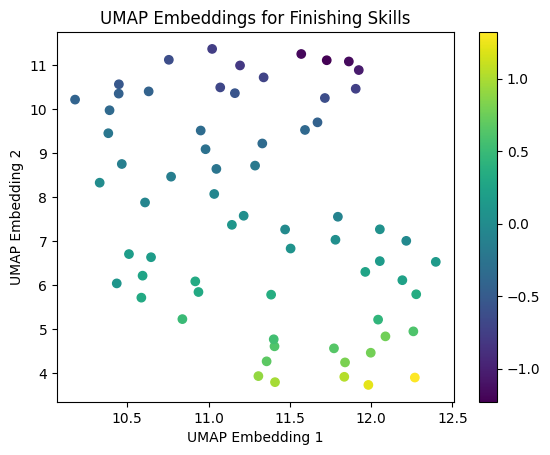

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot of the UMAP embeddings
plt.scatter(df['UMAP_Finish1'], df['UMAP_Finish2'], c=df['Finishing Score'], cmap='viridis')

# Add a colorbar legend to the plot
plt.colorbar()

# Set the axis labels and title of the plot
plt.xlabel('UMAP Embedding 1')
plt.ylabel('UMAP Embedding 2')
plt.title('UMAP Embeddings for Finishing Skills')
plt.savefig('umapfinishing.png',dpi=500,bbox_inches = 'tight')

# Dribbles

### Like passing, some features are negative and should be given a negative score.

In [19]:
data.columns

Index(['Player', 'Age', 'Minutes', 'Assists', 'Key Passes',
       'Open Play Assists', 'Open Play Key Passes', 'Open Play xG Assisted',
       'xG Assisted', 'Dispossessed [1]', 'Dribble%', 'Dribbles', 'Fouls Won',
       'Penalty wins', 'Successful Dribbles', 'Turnovers [2]',
       'Over/Underperformance [3]', 'Goal Conversion% [4]',
       'Non-Penalty Goals', 'Post Shot xG [5]', 'Shooting% [6]', 'Shots',
       'Shot Touch% [7]', 'xG', 'xG/Shot', 'Aggressive Actions [8]',
       'Aerial Win%', 'Aerial Wins', 'Counterpressure Regains',
       'Counterpressures', 'PAdj Pressures', 'Pressure Regains', 'Pressures',
       'Crossing% [10]', 'Deep Completions [11]',
       'Open Play Final Third Passes', 'OP Passes Into Box',
       'Passes Inside Box', 'Passes Into Box', 'Successful Crosses',
       'Throughballs', 'Touches In Box', 'Carries', 'Carry% [12]',
       'Carry Length', 'Deep Progressions [13]', 'xGBuildup [14]',
       'xGChain [15]', 'Final Third Pass Backward%',
       'F

In [20]:


# Define the dribbling features and the negative features
dribbling_features = ['Minutes','Dribble%', 'Dribbles', 'Carries', 'Carry% [12]', 'Carry Length', 'Dribble & Carry OBV','Successful Dribbles','Age_Encoded']
negatived_features = ['Dispossessed [1]', 'Turnovers [2]']

# Subset the data
dribbling_data = data[dribbling_features + negatived_features].copy()

# Scale the dribbling features using StandardScaler
scaler = StandardScaler()
dribbling_features_scaled = scaler.fit_transform(dribbling_data[dribbling_features])

# Scale the negative features using MinMaxScaler, which scales values to a range of [0, 1]
minmax_scaler = MinMaxScaler()
negatived_features_scaled = minmax_scaler.fit_transform(dribbling_data[negatived_features])

# Compute the weighted scores
positive_scores = dribbling_features_scaled.mean(axis=1)
negative_scores = 1 - negatived_features_scaled.mean(axis=1)
weighted_scores = positive_scores * negative_scores
df['Dribbling Score'] = weighted_scores
scaled_features = np.concatenate((dribbling_features_scaled, negatived_features_scaled, weighted_scores.reshape(-1, 1)), axis=1)

# Apply UMAP for visualization and clustering
umap_embeddings = umap.UMAP().fit_transform(scaled_features)


# Add the UMAP embeddings and dribbling scores to the original DataFrame
df['UMAP_Dribble1'] = umap_embeddings[:, 0]
df['UMAP_Dribble2'] = umap_embeddings[:, 1]


# Sort the DataFrame by dribbling score in descending order
dribbling_df = data.sort_values(by='Dribbling Score', ascending=False)
dribbling_df

Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
41  Player 42   29  2388.73320  0.226061    1.394044           0.226061   
51  Player 52   25  1373.21670  0.131079    1.114172           0.131079   
32  Player 33   28  2342.84990  0.345733    1.728664           0.230489   
15  Player 16   35  1895.10000  0.237455    1.424727           0.237455   
31  Player 32   20  2038.50010  0.220751    0.971302           0.220751   
45  Player 46   21   908.68335  0.000000    0.198089           0.000000   
48  Player 49   19  1056.61670  0.170355    0.596243           0.170355   
14  Player 15   24  2006.70000  0.089700    0.672746           0.089700   
60  Player 61   35  2359.03320  0.076302    0.953781           0.076302   
2    Player 3   29  2382.05030  0.037783    0.453391           0.037783   
28  Player 29   27   918.55000  0.000000    1.175766           0.000000   
57  Player 58   24  2574.35000  0.174801    0.559364           0.174801   
62  Player 63   23  2357.53320  0.038175    0.687159           0.038175   
43  Player 44   23  1570.58310  0.114607    0.630339           0.114607   
13  Player 14   19  1615.80000  0.055700    0.501300           0.055700   
37  Player 38   31   857.25000  0.104987    0.839895           0.104987   
49  Player 50   28  1603.61660  0.112246    0.617355           0.112246   
16  Player 17   28  2535.06670  0.035502    0.568032           0.035502   
24  Player 25   23  1187.13330  0.000000    0.682316           0.000000   
8    Player 9   21  2199.98340  0.081819    0.654550           0.081819   
50  Player 51   24  1458.98340  0.185060    0.925302           0.185060   
63  Player 64   22   863.40000  0.000000    0.938152           0.000000   
10  Player 11   26  2885.08350  0.093585    1.029433           0.093585   
54  Player 55   26  1874.45010  0.096028    1.200352           0.096028   
42  Player 43   29  1212.76660  0.000000    0.742105           0.000000   
6    Player 7   26  1144.13340  0.078662    0.629297           0.078662   
0    Player 1   20   871.76660  0.000000    0.722670           0.000000   
58  Player 59   25  2827.53340  0.031830    0.413788           0.031830   
17  Player 18   27  2458.03340  0.036615    0.366146           0.036615   
39  Player 40   20  1645.13330  0.000000    0.711189           0.000000   
44  Player 45   34  1523.93330  0.118115    0.944923           0.118115   
35  Player 36   29   705.66670  0.255078    1.530468           0.255078   
56  Player 57   26  1247.35010  0.144306    1.154447           0.144306   
23  Player 24   24   639.76670  0.000000    0.422029           0.000000   
5    Player 6   23  2221.95020  0.040505    0.445555           0.040505   
25  Player 26   28   933.24994  0.192874    0.675060           0.192874   
64  Player 65   25  2245.28320  0.080168    0.721513           0.080168   
47  Player 48   31  2208.81670  0.081492    1.303866           0.081492   
9   Player 10   22   629.46670  0.000000    0.857869           0.000000   
38  Player 39   28  2952.64970  0.121924    0.731546           0.121924   
40  Player 41   26  1781.04990  0.050532    0.252660           0.050532   
21  Player 22   18   704.31660  0.127783    0.511134           0.127783   
19  Player 20   29  1981.79990  0.045413    0.772026           0.045413   
27  Player 28   32  1665.81700  0.108055    0.810413           0.108055   
20  Player 21   30  1943.19980  0.092631    1.157884           0.092631   
52  Player 53   21  1387.78310  0.064852    0.389110           0.064852   
18  Player 19   31  1231.28340  0.000000    0.584756           0.000000   
30  Player 31   29  1760.64990  0.102235    0.460057           0.102235   
26  Player 27   32  2160.10000  0.000000    0.416647           0.000000   
65  Player 66   31  1469.63320  0.000000    0.489918           0.000000   
46  Player 47   33  1594.86670  0.056431    0.790035           0.056431   
59  Player 60   33  2181.16670  0.082525    1.237870           0.082525   
22  Player 23   23   626.66660  

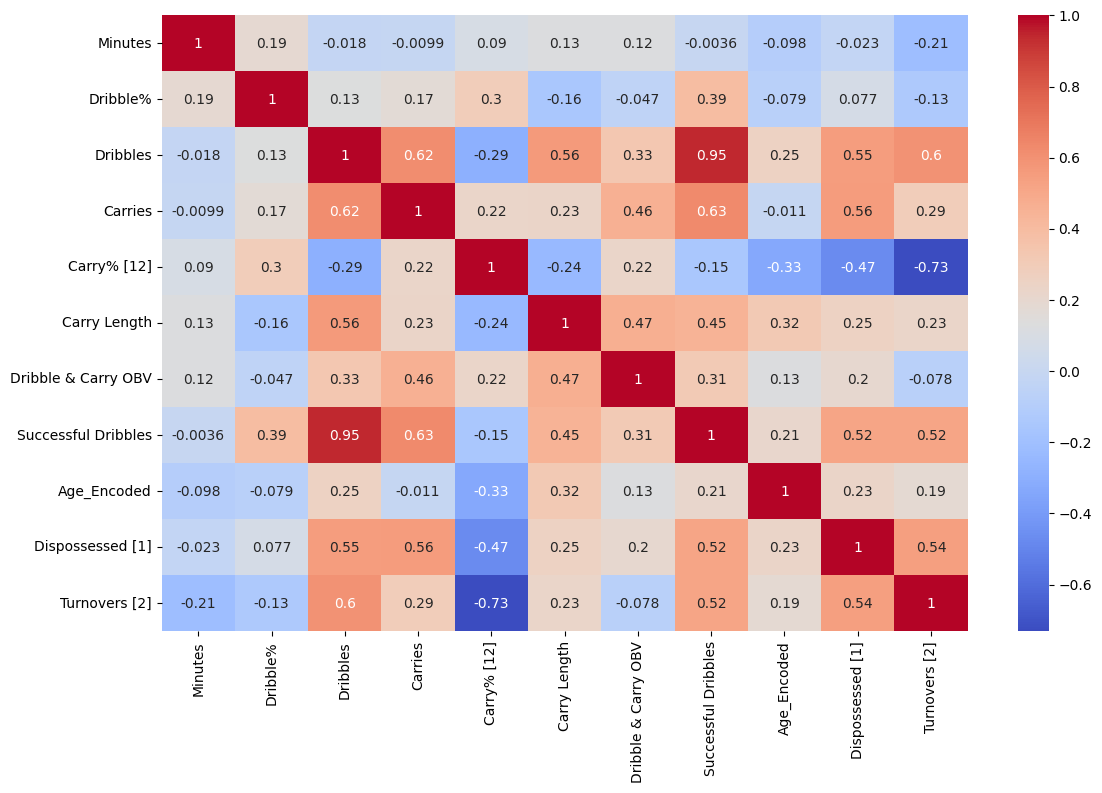

In [21]:
dribble_matrix = dribbling_data.corr()
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(dribble_matrix, annot=True, cmap='coolwarm')
plt.savefig('edadribbling.png',dpi=500,bbox_inches = 'tight')
plt.show()

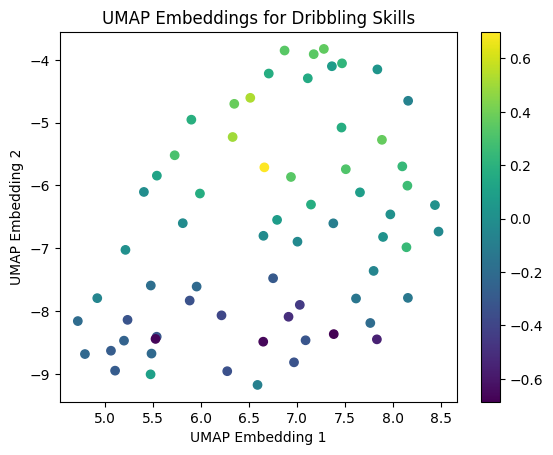

In [22]:
import matplotlib.pyplot as plt

# Create a scatter plot of the UMAP embeddings
plt.scatter(df['UMAP_Dribble1'], df['UMAP_Dribble2'], c=df['Dribbling Score'], cmap='viridis')

# Add a colorbar legend to the plot
plt.colorbar()

# Set the axis labels and title of the plot
plt.xlabel('UMAP Embedding 1')
plt.ylabel('UMAP Embedding 2')
plt.title('UMAP Embeddings for Dribbling Skills')
plt.savefig('umapdribbling.png',dpi=500,bbox_inches = 'tight')

# Work Rate duties 

## For the defensive aspect I decided to include the aerial and aerial win percentage because I think it's a feature that goes along with the hardwork of the striker towards the team I wanted first to take in hand also the linking up phase ( to better represent the target strikers ) but there were no enough features.

### Like passing and dribbling, some features are negative and should be given a negative score.

In [23]:
data.columns

Index(['Player', 'Age', 'Minutes', 'Assists', 'Key Passes',
       'Open Play Assists', 'Open Play Key Passes', 'Open Play xG Assisted',
       'xG Assisted', 'Dispossessed [1]', 'Dribble%', 'Dribbles', 'Fouls Won',
       'Penalty wins', 'Successful Dribbles', 'Turnovers [2]',
       'Over/Underperformance [3]', 'Goal Conversion% [4]',
       'Non-Penalty Goals', 'Post Shot xG [5]', 'Shooting% [6]', 'Shots',
       'Shot Touch% [7]', 'xG', 'xG/Shot', 'Aggressive Actions [8]',
       'Aerial Win%', 'Aerial Wins', 'Counterpressure Regains',
       'Counterpressures', 'PAdj Pressures', 'Pressure Regains', 'Pressures',
       'Crossing% [10]', 'Deep Completions [11]',
       'Open Play Final Third Passes', 'OP Passes Into Box',
       'Passes Inside Box', 'Passes Into Box', 'Successful Crosses',
       'Throughballs', 'Touches In Box', 'Carries', 'Carry% [12]',
       'Carry Length', 'Deep Progressions [13]', 'xGBuildup [14]',
       'xGChain [15]', 'Final Third Pass Backward%',
       'F

In [24]:
work_features=['Minutes','Aerial Win%', 'Aerial Wins','Counterpressure Regains','Counterpressures', 'PAdj Pressures', 'Pressure Regains', 'Pressures',   'Defensive Action OBV','Age_Encoded']
negatived_features=['Aggressive Actions [8]']
work = data[work_features].copy()
work_data = data[work_features + negatived_features].copy()
#Scale the work features using StandardScaler
scaler = StandardScaler()
work_features_scaled = scaler.fit_transform(work_data[work_features])

# Scale the negative features using MinMaxScaler, which scales values to a range of [0, 1]
minmax_scaler = MinMaxScaler()
negativedef_features_scaled = minmax_scaler.fit_transform(work_data[negatived_features])

# Compute the weighted scores
positive_scores = work_features_scaled.mean(axis=1)
negatived_scores = 1 - negatived_features_scaled.mean(axis=1)
weighted_scores = positive_scores * negatived_scores
df['Work Rate Score'] = weighted_scores

scaled_features = np.concatenate((work_features_scaled, negativedef_features_scaled, weighted_scores.reshape(-1, 1)), axis=1)

# Apply UMAP for visualization and clustering
umap_embeddings = umap.UMAP().fit_transform(scaled_features)


# Add the UMAP embeddings and work scores to the original DataFrame
df['UMAP_Work1'] = umap_embeddings[:, 0]
df['UMAP_Work2'] = umap_embeddings[:, 1]

# Sort the DataFrame by work score in descending order
work_df = data.sort_values(by='Work Rate Score', ascending=False)
work_df

Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
42  Player 43   29  1212.76660  0.000000    0.742105           0.000000   
5    Player 6   23  2221.95020  0.040505    0.445555           0.040505   
10  Player 11   26  2885.08350  0.093585    1.029433           0.093585   
65  Player 66   31  1469.63320  0.000000    0.489918           0.000000   
47  Player 48   31  2208.81670  0.081492    1.303866           0.081492   
62  Player 63   23  2357.53320  0.038175    0.687159           0.038175   
31  Player 32   20  2038.50010  0.220751    0.971302           0.220751   
38  Player 39   28  2952.64970  0.121924    0.731546           0.121924   
57  Player 58   24  2574.35000  0.174801    0.559364           0.174801   
16  Player 17   28  2535.06670  0.035502    0.568032           0.035502   
63  Player 64   22   863.40000  0.000000    0.938152           0.000000   
55  Player 56   25  1374.21670  0.065492    0.851394           0.065492   
35  Player 36   29   705.66670  0.255078    1.530468           0.255078   
41  Player 42   29  2388.73320  0.226061    1.394044           0.226061   
36  Player 37   31  1304.26660  0.207013    0.759047           0.207013   
52  Player 53   21  1387.78310  0.064852    0.389110           0.064852   
48  Player 49   19  1056.61670  0.170355    0.596243           0.170355   
39  Player 40   20  1645.13330  0.000000    0.711189           0.000000   
7    Player 8   28  1072.53360  0.167827    0.923048           0.167827   
19  Player 20   29  1981.79990  0.045413    0.772026           0.045413   
61  Player 62   29  1126.20010  0.000000    0.479489           0.000000   
32  Player 33   28  2342.84990  0.345733    1.728664           0.230489   
26  Player 27   32  2160.10000  0.000000    0.416647           0.000000   
17  Player 18   27  2458.03340  0.036615    0.366146           0.036615   
60  Player 61   35  2359.03320  0.076302    0.953781           0.076302   
21  Player 22   18   704.31660  0.127783    0.511134           0.127783   
24  Player 25   23  1187.13330  0.000000    0.682316           0.000000   
40  Player 41   26  1781.04990  0.050532    0.252660           0.050532   
13  Player 14   19  1615.80000  0.055700    0.501300           0.055700   
64  Player 65   25  2245.28320  0.080168    0.721513           0.080168   
51  Player 52   25  1373.21670  0.131079    1.114172           0.131079   
14  Player 15   24  2006.70000  0.089700    0.672746           0.089700   
8    Player 9   21  2199.98340  0.081819    0.654550           0.081819   
25  Player 26   28   933.24994  0.192874    0.675060           0.192874   
6    Player 7   26  1144.13340  0.078662    0.629297           0.078662   
53  Player 54   31  1206.56650  0.000000    0.298367           0.000000   
9   Player 10   22   629.46670  0.000000    0.857869           0.000000   
45  Player 46   21   908.68335  0.000000    0.198089           0.000000   
50  Player 51   24  1458.98340  0.185060    0.925302           0.185060   
1    Player 2   24   896.01666  0.100445    0.401778           0.100445   
44  Player 45   34  1523.93330  0.118115    0.944923           0.118115   
54  Player 55   26  1874.45010  0.096028    1.200352           0.096028   
20  Player 21   30  1943.19980  0.092631    1.157884           0.092631   
15  Player 16   35  1895.10000  0.237455    1.424727           0.237455   
37  Player 38   31   857.25000  0.104987    0.839895           0.104987   
28  Player 29   27   918.55000  0.000000    1.175766           0.000000   
23  Player 24   24   639.76670  0.000000    0.422029           0.000000   
30  Player 31   29  1760.64990  0.102235    0.460057           0.102235   
43  Player 44   23  1570.58310  0.114607    0.630339           0.114607   
12  Player 13   30  1267.83340  0.000000    0.638885           0.000000   
0    Player 1   20   871.76660  0.000000    0.722670           0.000000   
27  Player 28   32  1665.81700  0.108055    0.810413           0.108055   
3    Player 4   27   701.20010  

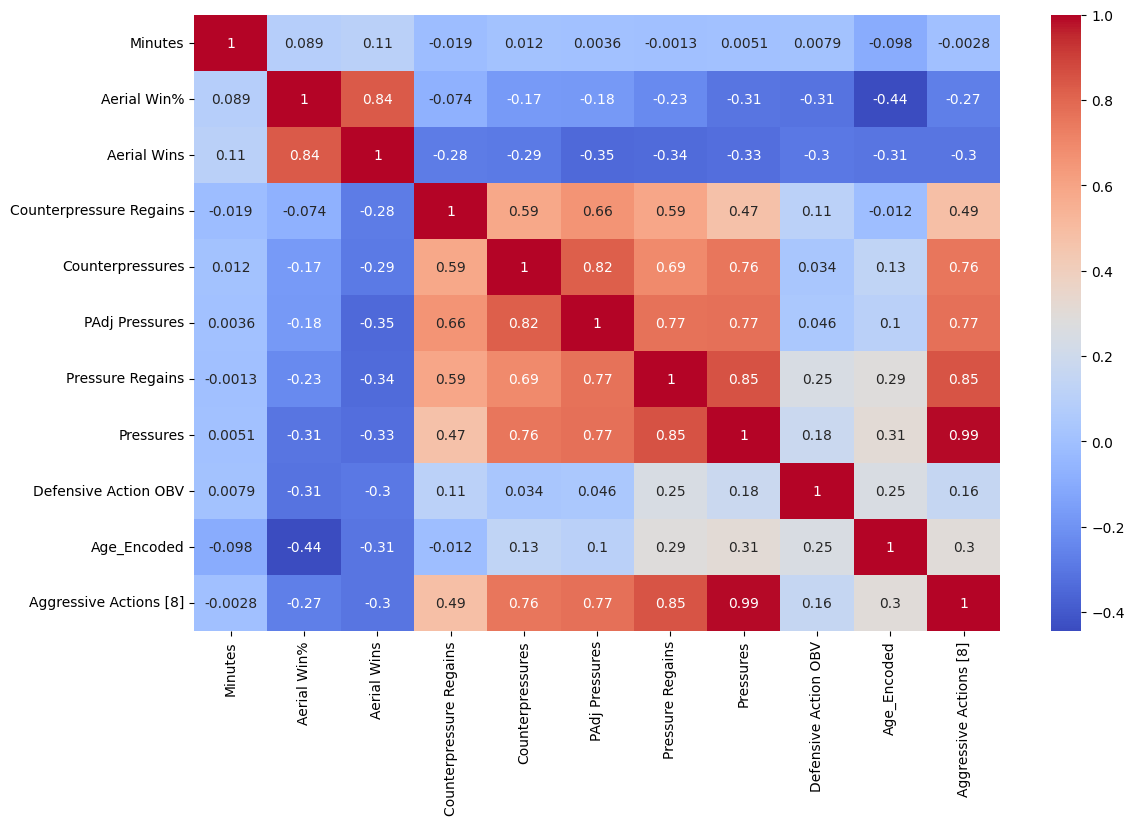

In [25]:
Work_matrix = work_data.corr()
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(Work_matrix, annot=True, cmap='coolwarm')

plt.savefig('edaworking.png',dpi=500,bbox_inches = 'tight')
plt.show()

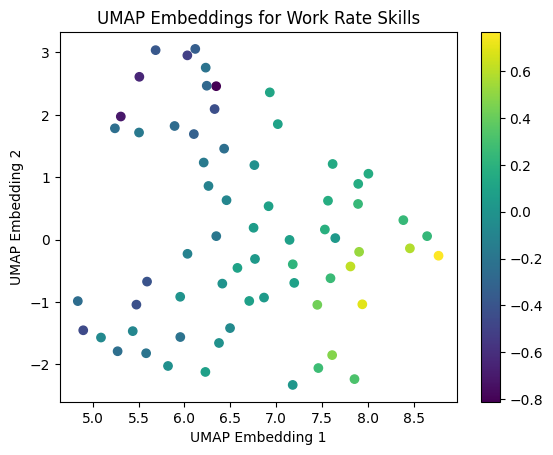

In [26]:
import matplotlib.pyplot as plt

# Create a scatter plot of the UMAP embeddings
plt.scatter(df['UMAP_Work1'], df['UMAP_Work2'], c=df['Work Rate Score'], cmap='viridis')

# Add a colorbar legend to the plot
plt.colorbar()

# Set the axis labels and title of the plot
plt.xlabel('UMAP Embedding 1')
plt.ylabel('UMAP Embedding 2')
plt.title('UMAP Embeddings for Work Rate Skills')
plt.savefig('umapworking.png',dpi=500,bbox_inches = 'tight')

In [27]:
data.columns

Index(['Player', 'Age', 'Minutes', 'Assists', 'Key Passes',
       'Open Play Assists', 'Open Play Key Passes', 'Open Play xG Assisted',
       'xG Assisted', 'Dispossessed [1]', 'Dribble%', 'Dribbles', 'Fouls Won',
       'Penalty wins', 'Successful Dribbles', 'Turnovers [2]',
       'Over/Underperformance [3]', 'Goal Conversion% [4]',
       'Non-Penalty Goals', 'Post Shot xG [5]', 'Shooting% [6]', 'Shots',
       'Shot Touch% [7]', 'xG', 'xG/Shot', 'Aggressive Actions [8]',
       'Aerial Win%', 'Aerial Wins', 'Counterpressure Regains',
       'Counterpressures', 'PAdj Pressures', 'Pressure Regains', 'Pressures',
       'Crossing% [10]', 'Deep Completions [11]',
       'Open Play Final Third Passes', 'OP Passes Into Box',
       'Passes Inside Box', 'Passes Into Box', 'Successful Crosses',
       'Throughballs', 'Touches In Box', 'Carries', 'Carry% [12]',
       'Carry Length', 'Deep Progressions [13]', 'xGBuildup [14]',
       'xGChain [15]', 'Final Third Pass Backward%',
       'F

# Clustering the strikers

## Now after getting reduced number of features for each aspect of the game it's time to cluster the strikers to regroup those who are similiar.

In [28]:
df

Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
0    Player 1   20   871.76660  0.000000    0.722670           0.000000   
1    Player 2   24   896.01666  0.100445    0.401778           0.100445   
2    Player 3   29  2382.05030  0.037783    0.453391           0.037783   
3    Player 4   27   701.20010  0.128351    0.898460           0.128351   
4    Player 5   27   707.71670  0.127170    1.271695           0.127170   
5    Player 6   23  2221.95020  0.040505    0.445555           0.040505   
6    Player 7   26  1144.13340  0.078662    0.629297           0.078662   
7    Player 8   28  1072.53360  0.167827    0.923048           0.167827   
8    Player 9   21  2199.98340  0.081819    0.654550           0.081819   
9   Player 10   22   629.46670  0.000000    0.857869           0.000000   
10  Player 11   26  2885.08350  0.093585    1.029433           0.093585   
11  Player 12   29  1913.41660  0.047036    0.658508           0.047036   
12  Player 13   30  1267.83340  0.000000    0.638885           0.000000   
13  Player 14   19  1615.80000  0.055700    0.501300           0.055700   
14  Player 15   24  2006.70000  0.089700    0.672746           0.089700   
15  Player 16   35  1895.10000  0.237455    1.424727           0.237455   
16  Player 17   28  2535.06670  0.035502    0.568032           0.035502   
17  Player 18   27  2458.03340  0.036615    0.366146           0.036615   
18  Player 19   31  1231.28340  0.000000    0.584756           0.000000   
19  Player 20   29  1981.79990  0.045413    0.772026           0.045413   
20  Player 21   30  1943.19980  0.092631    1.157884           0.092631   
21  Player 22   18   704.31660  0.127783    0.511134           0.127783   
22  Player 23   23   626.66660  0.000000    0.574468           0.000000   
23  Player 24   24   639.76670  0.000000    0.422029           0.000000   
24  Player 25   23  1187.13330  0.000000    0.682316           0.000000   
25  Player 26   28   933.24994  0.192874    0.675060           0.192874   
26  Player 27   32  2160.10000  0.000000    0.416647           0.000000   
27  Player 28   32  1665.81700  0.108055    0.810413           0.108055   
28  Player 29   27   918.55000  0.000000    1.175766           0.000000   
29  Player 30   33   794.53345  0.113274    0.566370           0.113274   
30  Player 31   29  1760.64990  0.102235    0.460057           0.102235   
31  Player 32   20  2038.50010  0.220751    0.971302           0.220751   
32  Player 33   28  2342.84990  0.345733    1.728664           0.230489   
33  Player 34   35   608.65010  0.000000    1.182946           0.000000   
34  Player 35   29  2292.56640  0.078515    0.235544           0.078515   
35  Player 36   29   705.66670  0.255078    1.530468           0.255078   
36  Player 37   31  1304.26660  0.207013    0.759047           0.207013   
37  Player 38   31   857.25000  0.104987    0.839895           0.104987   
38  Player 39   28  2952.64970  0.121924    0.731546           0.121924   
39  Player 40   20  1645.13330  0.000000    0.711189           0.000000   
40  Player 41   26  1781.04990  0.050532    0.252660           0.050532   
41  Player 42   29  2388.73320  0.226061    1.394044           0.226061   
42  Player 43   29  1212.76660  0.000000    0.742105           0.000000   
43  Player 44   23  1570.58310  0.114607    0.630339           0.114607   
44  Player 45   34  1523.93330  0.118115    0.944923           0.118115   
45  Player 46   21   908.68335  0.000000    0.198089           0.000000   
46  Player 47   33  1594.86670  0.056431    0.790035           0.056431   
47  Player 48   31  2208.81670  0.081492    1.303866           0.081492   
48  Player 49   19  1056.61670  0.170355    0.596243           0.170355   
49  Player 50   28  1603.61660  0.112246    0.617355           0.112246   
50  Player 51   24  1458.98340  0.185060    0.925302           0.185060   
51  Player 52   25  1373.21670  0.131079    1.114172           0.131079   
52  Player 53   21  1387.78310  

### I decided to make new scores to get the on ball value of a striker  and the overall value.

In [29]:
df['Overall Score']=(df['Passing Score']+ df['Finishing Score'] + df['Dribbling Score'] + df['Work Rate Score'])/4
df['On the Ball Score']=(df['Passing Score'] + df['Dribbling Score'])/2


In [30]:
from sklearn.mixture import GaussianMixture

# Select the UMAP embeddings for dribbling and finishing skills
umap_pass = np.array(df[['UMAP_Pass1', 'UMAP_Pass2']])
umap_finish = np.array(df[['UMAP_Finish1', 'UMAP_Finish2']])
umap_dribble = np.array(df[['UMAP_Dribble1', 'UMAP_Dribble2']])
umap_Working = np.array(df[['UMAP_Work1', 'UMAP_Work2']])
umap_df = np.concatenate((umap_dribble, umap_finish,umap_pass,umap_Working), axis=1)

# Define the hyperparameters
n_components = 4
covariance_type = 'full'
tol = 1e-3
max_iter = 100

# Refine the clusters using GMM with the hyperparameters
gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, tol=tol, max_iter=max_iter)
gmm_labels = gmm.fit_predict(umap_df)

# Add the GMM cluster labels to the DataFrame
df['GMM Cluster'] = gmm_labels+1

# Sort the DataFrame by overall score and cluster labels
df.sort_values(by=['Overall Score', 'GMM Cluster'], ascending=[False, True])


Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
41  Player 42   29  2388.73320  0.226061    1.394044           0.226061   
15  Player 16   35  1895.10000  0.237455    1.424727           0.237455   
48  Player 49   19  1056.61670  0.170355    0.596243           0.170355   
32  Player 33   28  2342.84990  0.345733    1.728664           0.230489   
50  Player 51   24  1458.98340  0.185060    0.925302           0.185060   
10  Player 11   26  2885.08350  0.093585    1.029433           0.093585   
31  Player 32   20  2038.50010  0.220751    0.971302           0.220751   
57  Player 58   24  2574.35000  0.174801    0.559364           0.174801   
39  Player 40   20  1645.13330  0.000000    0.711189           0.000000   
38  Player 39   28  2952.64970  0.121924    0.731546           0.121924   
20  Player 21   30  1943.19980  0.092631    1.157884           0.092631   
63  Player 64   22   863.40000  0.000000    0.938152           0.000000   
47  Player 48   31  2208.81670  0.081492    1.303866           0.081492   
8    Player 9   21  2199.98340  0.081819    0.654550           0.081819   
54  Player 55   26  1874.45010  0.096028    1.200352           0.096028   
56  Player 57   26  1247.35010  0.144306    1.154447           0.144306   
51  Player 52   25  1373.21670  0.131079    1.114172           0.131079   
25  Player 26   28   933.24994  0.192874    0.675060           0.192874   
17  Player 18   27  2458.03340  0.036615    0.366146           0.036615   
5    Player 6   23  2221.95020  0.040505    0.445555           0.040505   
16  Player 17   28  2535.06670  0.035502    0.568032           0.035502   
37  Player 38   31   857.25000  0.104987    0.839895           0.104987   
43  Player 44   23  1570.58310  0.114607    0.630339           0.114607   
42  Player 43   29  1212.76660  0.000000    0.742105           0.000000   
62  Player 63   23  2357.53320  0.038175    0.687159           0.038175   
19  Player 20   29  1981.79990  0.045413    0.772026           0.045413   
44  Player 45   34  1523.93330  0.118115    0.944923           0.118115   
24  Player 25   23  1187.13330  0.000000    0.682316           0.000000   
36  Player 37   31  1304.26660  0.207013    0.759047           0.207013   
35  Player 36   29   705.66670  0.255078    1.530468           0.255078   
64  Player 65   25  2245.28320  0.080168    0.721513           0.080168   
2    Player 3   29  2382.05030  0.037783    0.453391           0.037783   
13  Player 14   19  1615.80000  0.055700    0.501300           0.055700   
55  Player 56   25  1374.21670  0.065492    0.851394           0.065492   
60  Player 61   35  2359.03320  0.076302    0.953781           0.076302   
27  Player 28   32  1665.81700  0.108055    0.810413           0.108055   
14  Player 15   24  2006.70000  0.089700    0.672746           0.089700   
26  Player 27   32  2160.10000  0.000000    0.416647           0.000000   
6    Player 7   26  1144.13340  0.078662    0.629297           0.078662   
0    Player 1   20   871.76660  0.000000    0.722670           0.000000   
65  Player 66   31  1469.63320  0.000000    0.489918           0.000000   
49  Player 50   28  1603.61660  0.112246    0.617355           0.112246   
21  Player 22   18   704.31660  0.127783    0.511134           0.127783   
28  Player 29   27   918.55000  0.000000    1.175766           0.000000   
58  Player 59   25  2827.53340  0.031830    0.413788           0.031830   
40  Player 41   26  1781.04990  0.050532    0.252660           0.050532   
7    Player 8   28  1072.53360  0.167827    0.923048           0.167827   
45  Player 46   21   908.68335  0.000000    0.198089           0.000000   
12  Player 13   30  1267.83340  0.000000    0.638885           0.000000   
53  Player 54   31  1206.56650  0.000000    0.298367           0.000000   
59  Player 60   33  2181.16670  0.082525    1.237870           0.082525   
23  Player 24   24   639.76670  0.000000    0.422029           0.000000   
52  Player 53   21  1387.78310  

/tmp/ipykernel_17646/1785147752.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])


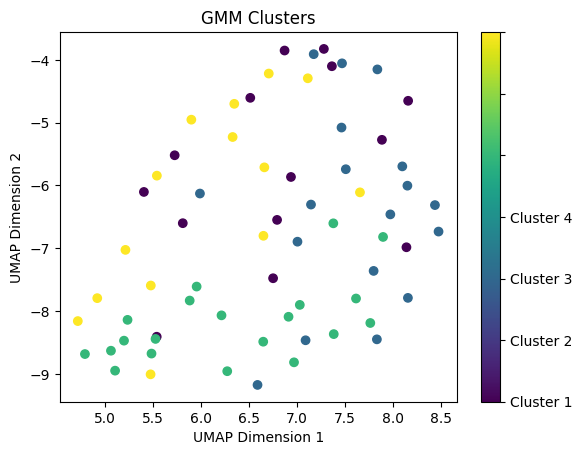

In [31]:
import matplotlib.pyplot as plt

# Create a scatter plot of the UMAP embeddings colored by GMM cluster labels
plt.scatter(umap_df[:, 0], umap_df[:, 1], c=gmm_labels)

# Add axis labels and title
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('GMM Clusters')

# Add a colorbar with cluster labels
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

# Show the plot

plt.savefig('clusters.png',dpi=500,bbox_inches = 'tight')
plt.show()

In [32]:
df['GMM Cluster'].value_counts()

3    20
2    18
1    14
4    14
Name: GMM Cluster, dtype: int64

## Let's add percentile ranks for each score to see where the strikers rank in each features that is a score.

In [33]:
# Define a list of column names containing 'Score'
score_cols = [col for col in df.columns if 'Score' in col]

# Loop through each score column and calculate the percentile rank
for col in score_cols:
    rank_col = col.replace('Score', 'Percentile') # Define new column name
    df[rank_col] = df[col].rank(pct=True) # Calculate percentile rank and add as new column


In [34]:
df.columns

Index(['Player', 'Age', 'Minutes', 'Assists', 'Key Passes',
       'Open Play Assists', 'Open Play Key Passes', 'Open Play xG Assisted',
       'xG Assisted', 'Dispossessed [1]', 'Dribble%', 'Dribbles', 'Fouls Won',
       'Penalty wins', 'Successful Dribbles', 'Turnovers [2]',
       'Over/Underperformance [3]', 'Goal Conversion% [4]',
       'Non-Penalty Goals', 'Post Shot xG [5]', 'Shooting% [6]', 'Shots',
       'Shot Touch% [7]', 'xG', 'xG/Shot', 'Aggressive Actions [8]',
       'Aerial Win%', 'Aerial Wins', 'Counterpressure Regains',
       'Counterpressures', 'PAdj Pressures', 'Pressure Regains', 'Pressures',
       'Crossing% [10]', 'Deep Completions [11]',
       'Open Play Final Third Passes', 'OP Passes Into Box',
       'Passes Inside Box', 'Passes Into Box', 'Successful Crosses',
       'Throughballs', 'Touches In Box', 'Carries', 'Carry% [12]',
       'Carry Length', 'Deep Progressions [13]', 'xGBuildup [14]',
       'xGChain [15]', 'Final Third Pass Backward%',
       'F

In [35]:
#Balanced ones
first=df[df['GMM Cluster']==1]
first

Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
3    Player 4   27   701.20010  0.128351    0.898460           0.128351   
6    Player 7   26  1144.13340  0.078662    0.629297           0.078662   
9   Player 10   22   629.46670  0.000000    0.857869           0.000000   
14  Player 15   24  2006.70000  0.089700    0.672746           0.089700   
22  Player 23   23   626.66660  0.000000    0.574468           0.000000   
23  Player 24   24   639.76670  0.000000    0.422029           0.000000   
28  Player 29   27   918.55000  0.000000    1.175766           0.000000   
31  Player 32   20  2038.50010  0.220751    0.971302           0.220751   
35  Player 36   29   705.66670  0.255078    1.530468           0.255078   
42  Player 43   29  1212.76660  0.000000    0.742105           0.000000   
45  Player 46   21   908.68335  0.000000    0.198089           0.000000   
51  Player 52   25  1373.21670  0.131079    1.114172           0.131079   
60  Player 61   35  2359.03320  0.076302    0.953781           0.076302   
62  Player 63   23  2357.53320  0.038175    0.687159           0.038175   

    Open Play Key Passes  Open Play xG Assisted  xG Assisted  \
3               0.898460               0.136767     0.136767   
6               0.629297               0.053553     0.053553   
9               0.857869               0.034905     0.034905   
14              0.672746               0.065805     0.065805   
22              0.574468               0.101789     0.101789   
23              0.281353               0.019843     0.033513   
28              1.175766               0.077444     0.077444   
31              0.971302               0.161976     0.161976   
35              1.530468               0.179687     0.179687   
42              0.742105               0.054465     0.054465   
45              0.198089               0.004935     0.004935   
51              1.114172               0.111432     0.111432   
60              0.953781               0.093238     0.093238   
62              0.610808               0.061939     0.064645   

    Dispossessed [1]  Dribble%  Dribbles  Fouls Won  Penalty wins  \
3           1.283514  0.600000  0.641757   0.256703      0.000000   
6           2.831838  0.473684  2.989162   1.809230      0.000000   
9           2.430629  0.333333  1.715738   1.572760      0.000000   
14          2.063089  0.655738  2.735835   0.762446      0.000000   
22          0.718085  0.333333  0.430851   1.723404      0.000000   
23          1.406763  0.571429  0.984734   0.844058      0.000000   
28          1.469708  0.625000  1.567688   1.273747      0.000000   
31          1.854304  0.486486  1.633554   0.971302      0.000000   
35          3.060935  0.600000  1.275390   1.530468      0.127539   
42          1.558420  0.400000  0.371052   1.261578      0.074210   
45          1.386622  0.517241  2.872288   2.872288      0.000000   
51          3.145898  0.528302  3.473596   3.473596      0.065540   
60          1.831258  0.395833  1.831258   2.670585      0.076302   
62          0.954387  0.500000  0.839861   0.648983      0.000000   

    Successful Dribbles  Turnovers [2]  Over/Underperformance [3]  \
3              0.385054       3.465488                  -0.142331   
6              1.415919       5.821000                   0.016760   
9              0.571913       6.291040                  -0.084671   
14             1.793990       5.426820                  -0.002190   
22             0.143617       2.441489                  -0.172240   
23             0.562705       2.672849                  -0.053177   
28             0.979805       3.527299                   0.083917   
31             0.794702       3.708609                   0.031267   
35             0.765234       4.336325                   0.020121   
42             0.148421       3.191051                  -0.100358   
45             1.485666       4.556043                  -0.101118   
51             1.835107       4.325610                  

In [36]:
second=df[df['GMM Cluster']==2]
second

Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
0    Player 1   20   871.76660  0.000000    0.722670           0.000000   
1    Player 2   24   896.01666  0.100445    0.401778           0.100445   
2    Player 3   29  2382.05030  0.037783    0.453391           0.037783   
5    Player 6   23  2221.95020  0.040505    0.445555           0.040505   
13  Player 14   19  1615.80000  0.055700    0.501300           0.055700   
16  Player 17   28  2535.06670  0.035502    0.568032           0.035502   
17  Player 18   27  2458.03340  0.036615    0.366146           0.036615   
21  Player 22   18   704.31660  0.127783    0.511134           0.127783   
24  Player 25   23  1187.13330  0.000000    0.682316           0.000000   
25  Player 26   28   933.24994  0.192874    0.675060           0.192874   
38  Player 39   28  2952.64970  0.121924    0.731546           0.121924   
39  Player 40   20  1645.13330  0.000000    0.711189           0.000000   
43  Player 44   23  1570.58310  0.114607    0.630339           0.114607   
48  Player 49   19  1056.61670  0.170355    0.596243           0.170355   
49  Player 50   28  1603.61660  0.112246    0.617355           0.112246   
55  Player 56   25  1374.21670  0.065492    0.851394           0.065492   
57  Player 58   24  2574.35000  0.174801    0.559364           0.174801   
64  Player 65   25  2245.28320  0.080168    0.721513           0.080168   

    Open Play Key Passes  Open Play xG Assisted  xG Assisted  \
0               0.722670               0.076997     0.076997   
1               0.401778               0.089793     0.089793   
2               0.340043               0.041059     0.054755   
5               0.445555               0.036570     0.036570   
13              0.501300               0.080613     0.080613   
16              0.568032               0.046730     0.046730   
17              0.366146               0.053101     0.053101   
21              0.511134               0.030667     0.030667   
24              0.682316               0.027177     0.027177   
25              0.675060               0.106216     0.106216   
38              0.731546               0.083669     0.083669   
39              0.711189               0.073370     0.073370   
43              0.630339               0.052629     0.052629   
48              0.596243               0.060193     0.060193   
49              0.617355               0.047447     0.047447   
55              0.851394               0.109120     0.109120   
57              0.524404               0.112291     0.115625   
64              0.721513               0.058541     0.058541   

    Dispossessed [1]  Dribble%  Dribbles  Fouls Won  Penalty wins  \
0           1.548580  0.380952  2.168011   0.929148      0.000000   
1           1.104890  0.333333  0.602667   1.808002      0.100445   
2           1.057912  0.500000  1.435738   1.209043      0.000000   
5           1.215149  0.310345  1.174644   1.660703      0.040505   
13          2.060898  0.387755  2.729298   1.670999      0.055700   
16          2.130122  0.537037  1.917109   0.710040      0.000000   
17          2.196878  0.354167  1.757503   1.903961      0.036615   
21          2.811236  0.333333  1.533401   2.172318      0.127783   
24          2.046948  0.500000  0.909755   1.364632      0.000000   
25          0.867935  0.375000  1.542995   0.964372      0.000000   
38          1.097320  0.440000  0.762027   1.706941      0.030481   
39          2.571220  0.466667  0.820602   1.969445      0.109414   
43          1.088768  0.541667  1.375285   0.401125      0.000000   
48          1.362840  0.516129  2.640503   1.788728      0.000000   
49          1.290832  0.428571  1.178586   1.571448      0.056123   
55          1.244345  0.357143  0.916886   1.178853      0.065492   
57          1.678093  0.448276  1.013848   0.769126      0.069921   
64          2.525294  0.441176  1.362857   0.641344      0.000000   

    Successful Dribbles  Turnovers [2]  Over/Underpe

In [37]:
third=df[df['GMM Cluster']==3]
third

Player  Age     Minutes   Assists  Key Passes  Open Play Assists  \
4    Player 5   27   707.71670  0.127170    1.271695           0.127170   
7    Player 8   28  1072.53360  0.167827    0.923048           0.167827   
11  Player 12   29  1913.41660  0.047036    0.658508           0.047036   
12  Player 13   30  1267.83340  0.000000    0.638885           0.000000   
18  Player 19   31  1231.28340  0.000000    0.584756           0.000000   
19  Player 20   29  1981.79990  0.045413    0.772026           0.045413   
26  Player 27   32  2160.10000  0.000000    0.416647           0.000000   
29  Player 30   33   794.53345  0.113274    0.566370           0.113274   
30  Player 31   29  1760.64990  0.102235    0.460057           0.102235   
33  Player 34   35   608.65010  0.000000    1.182946           0.000000   
34  Player 35   29  2292.56640  0.078515    0.235544           0.078515   
36  Player 37   31  1304.26660  0.207013    0.759047           0.207013   
40  Player 41   26  1781.04990  0.050532    0.252660           0.050532   
46  Player 47   33  1594.86670  0.056431    0.790035           0.056431   
52  Player 53   21  1387.78310  0.064852    0.389110           0.064852   
53  Player 54   31  1206.56650  0.000000    0.298367           0.000000   
58  Player 59   25  2827.53340  0.031830    0.413788           0.031830   
59  Player 60   33  2181.16670  0.082525    1.237870           0.082525   
61  Player 62   29  1126.20010  0.000000    0.479489           0.000000   
65  Player 66   31  1469.63320  0.000000    0.489918           0.000000   

    Open Play Key Passes  Open Play xG Assisted  xG Assisted  \
4               1.271695               0.135483     0.135483   
7               0.923048               0.063701     0.063701   
11              0.658508               0.065429     0.065429   
12              0.638885               0.028081     0.028081   
18              0.584756               0.034073     0.034073   
19              0.772026               0.064706     0.064706   
26              0.416647               0.046139     0.046139   
29              0.566370               0.046163     0.046163   
30              0.460057               0.034954     0.034954   
33              1.182946               0.070934     0.070934   
34              0.235544               0.015640     0.015640   
36              0.690043               0.046732     0.048137   
40              0.252660               0.017193     0.017193   
46              0.790035               0.049678     0.049678   
52              0.389110               0.026238     0.026238   
53              0.298367               0.072108     0.072108   
58              0.413788               0.036370     0.036370   
59              1.237870               0.089461     0.089461   
61              0.479489               0.025918     0.025918   
65              0.489918               0.047939     0.047939   

    Dispossessed [1]  Dribble%  Dribbles  Fouls Won  Penalty wins  \
4           0.635848  0.250000  0.508678   1.017356      0.000000   
7           0.839135  0.250000  0.671308   1.258702      0.083913   
11          0.987762  0.388889  0.846653   0.517399      0.000000   
12          2.058630  0.444444  0.638885   1.064809      0.000000   
18          2.119739  0.230769  0.950228   2.485212      0.073094   
19          2.179837  0.375000  1.089918   2.043597      0.000000   
26          0.999954  0.538462  0.541642   1.666589      0.041665   
29          1.472562  0.400000  0.566370   1.132740      0.000000   
30          1.073467  0.600000  0.511175   1.584642      0.000000   
33          1.035078  0.500000  0.591473   2.365892      0.000000   
34          1.216977  0.500000  0.628117   1.609550      0.000000   
36          1.725107  0.333333  1.035065   1.725107      0.000000   
40          1.566492  0.315789  0.960108   2.577132      0.101064   
46          0.564311  0.600000  0.564311   1.636500      0.000000   
52          1.945549  0.333333  0.778220   1.945549

In [38]:
fourth=df[df['GMM Cluster']==4]
fourth

Player  Age    Minutes   Assists  Key Passes  Open Play Assists  \
8    Player 9   21  2199.9834  0.081819    0.654550           0.081819   
10  Player 11   26  2885.0835  0.093585    1.029433           0.093585   
15  Player 16   35  1895.1000  0.237455    1.424727           0.237455   
20  Player 21   30  1943.1998  0.092631    1.157884           0.092631   
27  Player 28   32  1665.8170  0.108055    0.810413           0.108055   
32  Player 33   28  2342.8499  0.345733    1.728664           0.230489   
37  Player 38   31   857.2500  0.104987    0.839895           0.104987   
41  Player 42   29  2388.7332  0.226061    1.394044           0.226061   
44  Player 45   34  1523.9333  0.118115    0.944923           0.118115   
47  Player 48   31  2208.8167  0.081492    1.303866           0.081492   
50  Player 51   24  1458.9834  0.185060    0.925302           0.185060   
54  Player 55   26  1874.4501  0.096028    1.200352           0.096028   
56  Player 57   26  1247.3501  0.144306    1.154447           0.144306   
63  Player 64   22   863.4000  0.000000    0.938152           0.000000   

    Open Play Key Passes  Open Play xG Assisted  xG Assisted  \
8               0.654550               0.072437     0.072437   
10              1.029433               0.072263     0.072263   
15              1.424727               0.197489     0.197489   
20              1.157884               0.077451     0.077451   
27              0.810413               0.074787     0.074787   
32              1.229272               0.196598     0.239645   
37              0.839895               0.118769     0.118769   
41              1.092629               0.127574     0.140173   
44              0.944923               0.087426     0.087426   
47              1.303866               0.109623     0.109623   
50              0.925302               0.165117     0.165117   
54              1.200352               0.099444     0.099444   
56              1.154447               0.179094     0.179094   
63              0.833912               0.038727     0.039635   

    Dispossessed [1]  Dribble%  Dribbles  Fouls Won  Penalty wins  \
8           3.272752  0.518518  2.209108   1.922742      0.000000   
10          1.216603  0.800000  0.311949   1.060628      0.000000   
15          1.899636  0.469697  3.134399   0.664873      0.047491   
20          1.343145  0.473684  0.879992   0.787361      0.000000   
27          1.188606  0.391304  1.242633   1.296661      0.000000   
32          1.344516  0.509434  2.035982   0.960369      0.000000   
37          2.099737  0.650000  2.099737   1.049869      0.000000   
41          1.356368  0.411765  1.281014   1.394044      0.037677   
44          2.007962  0.480000  1.476443   2.539481      0.059058   
47          1.833561  0.521739  0.937153   0.733424      0.040746   
50          3.701207  0.540540  2.282411   1.418796      0.061687   
54          0.912268  0.400000  1.200352   0.240070      0.000000   
56          1.226600  0.400000  0.721530   1.948130      0.072153   
63          2.293259  0.470588  1.772064   2.397498      0.000000   

    Successful Dribbles  Turnovers [2]  Over/Underperformance [3]  \
8              1.145463       4.131849                   0.104334   
10             0.249559       2.651570                   0.046137   
15             1.472218       4.416654                   0.237221   
20             0.416838       3.242075                   0.063473   
27             0.486248       3.889983                   0.198097   
32             1.037198       3.572572                   0.221124   
37             1.364829       5.039370                  -0.006505   
41             0.527476       2.411320                   0.114398   
44             0.708692       4.901789                  -0.022701   
47             0.488950       3.300410                  -0.024556   
50             1.233736       4.688196                   0.099062   
54             0.480141       3.312972                   0.075622   
56

## On first view, the clusters are not that representative of the strikers profile so I decided to view a mean player of each cluster in a pizza chart to see what they're like and the clusters define more the level of the striker in all of the areas in the championship and it's easy to see with the percentile rank.

In [39]:
meanfourth=fourth.mean()
meanfourth

/tmp/ipykernel_17646/458056149.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  meanfourth=fourth.mean()


Age                                  28.214286
Minutes                            1811.067886
Assists                               0.136809
Key Passes                            1.107618
Open Play Assists                     0.128577
Open Play Key Passes                  1.042972
Open Play xG Assisted                 0.115486
xG Assisted                           0.119525
Dispossessed [1]                      1.835444
Dribble%                              0.502662
Dribbles                              1.541769
Fouls Won                             1.315282
Penalty wins                          0.022772
Successful Dribbles                   0.766705
Turnovers [2]                         3.817158
Over/Underperformance [3]             0.078786
Goal Conversion% [4]                  0.152282
Non-Penalty Goals                     0.372427
Post Shot xG [5]                      0.344181
Shooting% [6]                         0.384845
Shots                                 2.492836
Shot Touch% [

In [40]:
params=['Passing','Finishing','Dribbling', 'Work Rate','Overall' , 'On the Ball']
v = [0.415152, 0.694697, 0.625000, 0.563636, 0.632576, 0.561364]
v = [x * 100 for x in v]
print(v)


[41.5152, 69.4697, 62.5, 56.363600000000005, 63.257600000000004, 56.136399999999995]


In [41]:
import matplotlib.pyplot as plt
from mplsoccer import  PyPizza

baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)


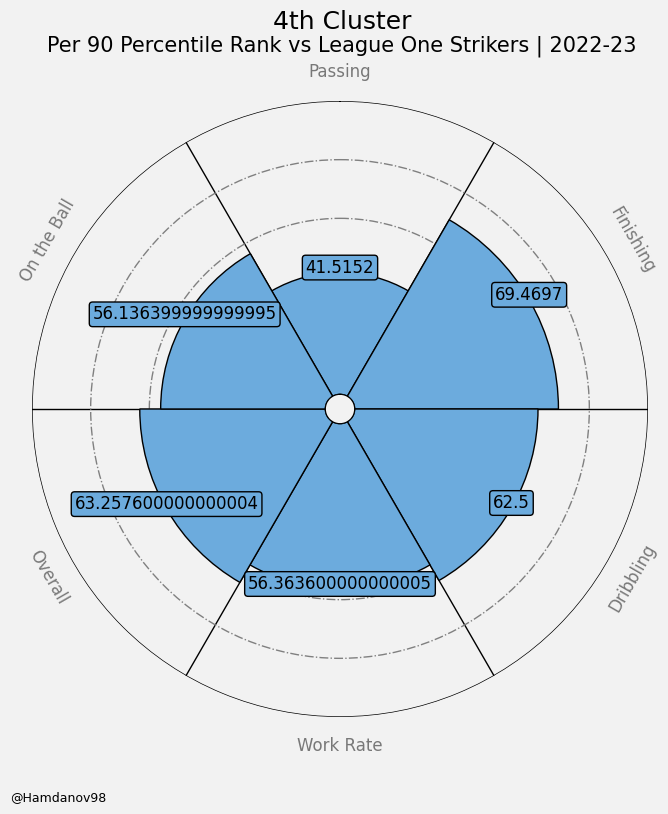

In [42]:
# plot pizza
fig, ax = baker.make_pizza(
    v,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#6CABDD", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center", alpha=.5
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#6CABDD",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "4th Cluster", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs League One Strikers | 2022-23",
    size=15,
    ha="center", color="#000000"
)




fig.text(
    0.1, 0.005, '@Hamdanov98', size=9,
    color="#000000",
    ha="left"
)

plt.savefig('fourth.png',dpi=500,bbox_inches = 'tight')

In [43]:
meanthird=third.mean()
meanthird

/tmp/ipykernel_17646/2626011120.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  meanthird=third.mean()


Age                                  29.600000
Minutes                            1533.507483
Assists                               0.058733
Key Passes                            0.641038
Open Play Assists                     0.058733
Open Play Key Passes                  0.637588
Open Play xG Assisted                 0.050847
xG Assisted                           0.050917
Dispossessed [1]                      1.326020
Dribble%                              0.410438
Dribbles                              0.742625
Fouls Won                             1.449382
Penalty wins                          0.019640
Successful Dribbles                   0.288613
Turnovers [2]                         3.456529
Over/Underperformance [3]            -0.021105
Goal Conversion% [4]                  0.102895
Non-Penalty Goals                     0.184978
Post Shot xG [5]                      0.204052
Shooting% [6]                         0.336699
Shots                                 1.839758
Shot Touch% [

In [44]:
v = [0.715909, 0.315657, 0.768939, 0.662879, 0.621212, 0.795455]

v = [x * 100 for x in v]
print(v)


[71.5909, 31.565700000000003, 76.8939, 66.2879, 62.1212, 79.5455]


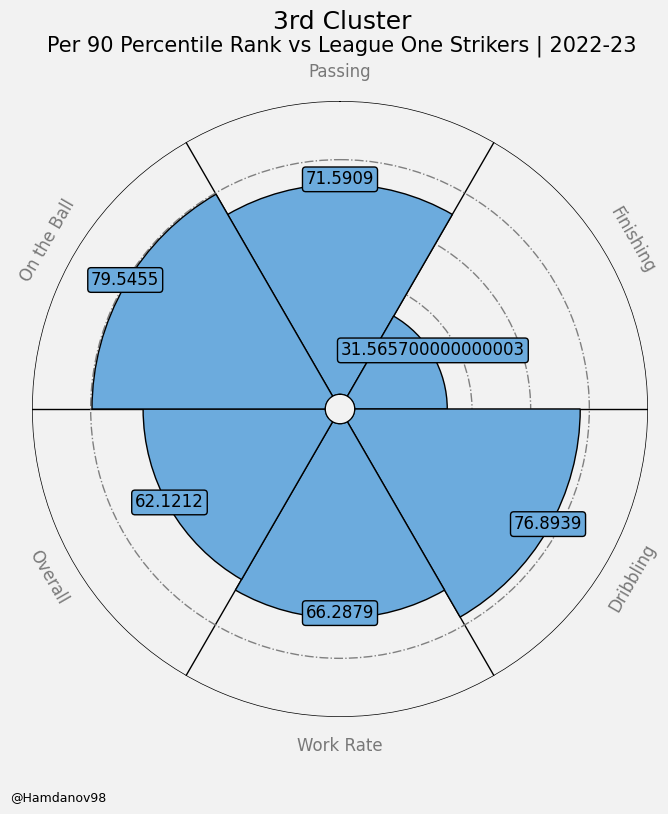

In [45]:
# plot pizza
fig, ax = baker.make_pizza(
    v,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#6CABDD", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center", alpha=.5
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#6CABDD",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "3rd Cluster", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs League One Strikers | 2022-23",
    size=15,
    ha="center", color="#000000"
)




fig.text(
    0.1, 0.005, '@Hamdanov98', size=9,
    color="#000000",
    ha="left"
)

plt.savefig('third.png',dpi=500,bbox_inches = 'tight')

In [46]:
meansecond=second.mean()
meansecond

/tmp/ipykernel_17646/2001680387.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  meansecond=second.mean()


Age                                  23.944444
Minutes                            1712.657389
Assists                               0.081489
Key Passes                            0.597018
Open Play Assists                     0.081489
Open Play Key Passes                  0.588779
Open Play xG Assisted                 0.065899
xG Assisted                           0.066845
Dispossessed [1]                      1.661070
Dribble%                              0.425086
Dribbles                              1.435651
Fouls Won                             1.356679
Penalty wins                          0.038471
Successful Dribbles                   0.615472
Turnovers [2]                         3.927685
Over/Underperformance [3]             0.027878
Goal Conversion% [4]                  0.154053
Non-Penalty Goals                     0.324609
Post Shot xG [5]                      0.297813
Shooting% [6]                         0.391138
Shots                                 2.229417
Shot Touch% [

In [47]:
v = [36.0071, 24.1533, 16.7558, 30.6595, 16.1319, 18.6275]
v



[36.0071, 24.1533, 16.7558, 30.6595, 16.1319, 18.6275]

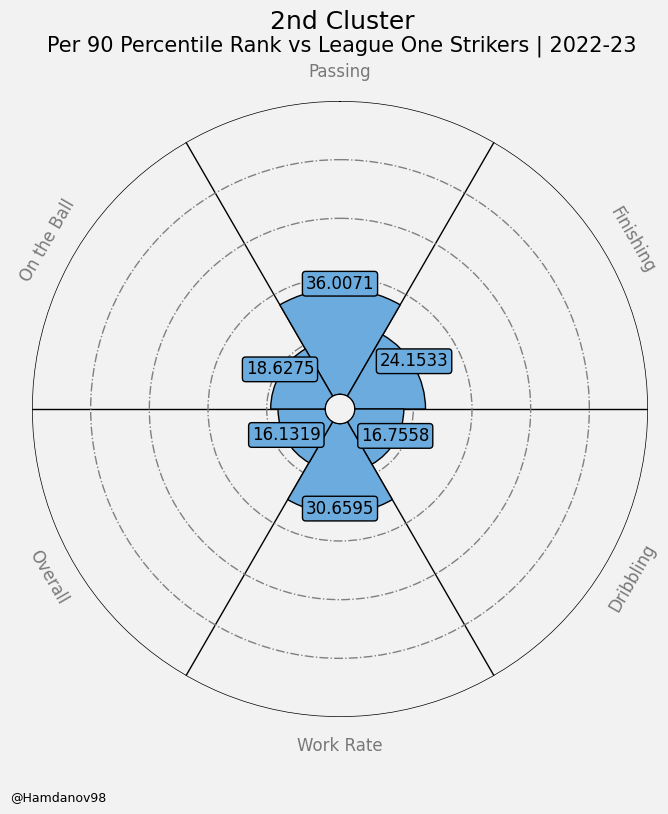

In [48]:
# plot pizza
fig, ax = baker.make_pizza(
    v,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#6CABDD", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center", alpha=.5
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#6CABDD",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "2nd Cluster", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs League One Strikers | 2022-23",
    size=15,
    ha="center", color="#000000"
)




fig.text(
    0.1, 0.005, '@Hamdanov98', size=9,
    color="#000000",
    ha="left"
)

plt.savefig('second.png',dpi=500,bbox_inches = 'tight')

In [49]:
meanfirst=first.mean()
meanfirst

/tmp/ipykernel_17646/270935542.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  meanfirst=first.mean()


Age                                  25.357143
Minutes                            1258.705954
Assists                               0.072721
Key Passes                            0.816265
Open Play Assists                     0.072721
Open Play Key Passes                  0.800763
Open Play xG Assisted                 0.082698
xG Assisted                           0.083868
Dispossessed [1]                      1.856818
Dribble%                              0.501456
Dribbles                              1.668769
Fouls Won                             1.547939
Penalty wins                          0.024542
Successful Dribbles                   0.859067
Turnovers [2]                         4.023383
Over/Underperformance [3]            -0.040793
Goal Conversion% [4]                  0.076080
Non-Penalty Goals                     0.122173
Post Shot xG [5]                      0.121270
Shooting% [6]                         0.323500
Shots                                 1.515739
Shot Touch% [

In [50]:
v = [0.239394, 0.410606, 0.565152, 0.474242, 0.380303, 0.431818]
v = [x * 100 for x in v]
print(v)


[23.9394, 41.0606, 56.5152, 47.4242, 38.0303, 43.181799999999996]


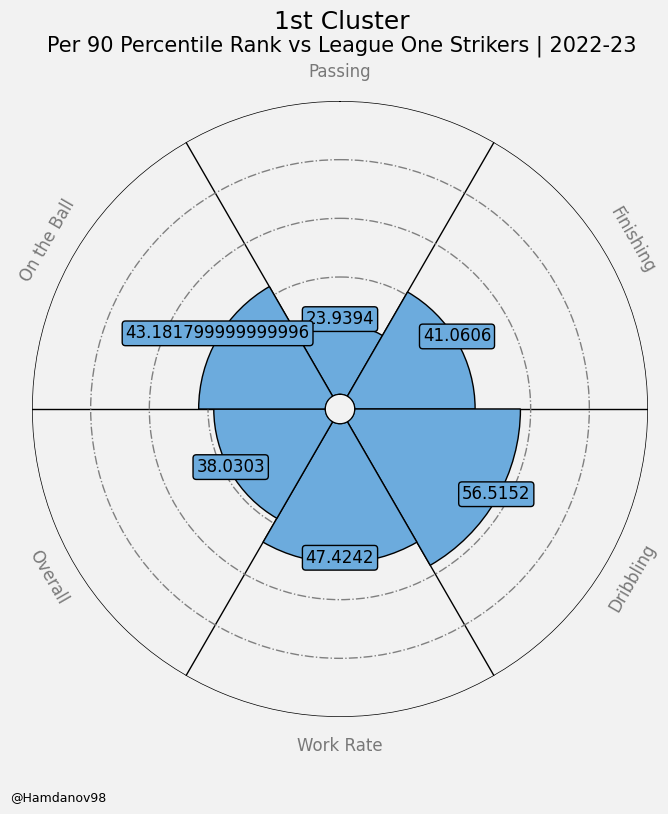

In [51]:
# plot pizza
fig, ax = baker.make_pizza(
    v,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#6CABDD", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center", alpha=.5
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#6CABDD",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "1st Cluster", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs League One Strikers | 2022-23",
    size=15,
    ha="center", color="#000000"
)




fig.text(
    0.1, 0.005, '@Hamdanov98', size=9,
    color="#000000",
    ha="left"
)

plt.savefig('first.png',dpi=500,bbox_inches = 'tight')

## The fourth and third cluster regroup the best strikers while the first and second regroup the not so good strikers so let's make a new dataframe containing the strikers ordered by the Overall score from the best cluster to the worst.

In [52]:
thebest = pd.concat([fourth.sort_values(by='Overall Score', ascending=False),
                     third.sort_values(by='Overall Score', ascending=False),
                     first.sort_values(by='Overall Score', ascending=False),
                     second.sort_values(by='Overall Score', ascending=False)])
thebest=thebest[['Player','Age','Overall Score','Finishing Score','Passing Score','Dribbling Score','Work Rate Score','On the Ball Score','GMM Cluster','Passing Percentile','Finishing Percentile','Dribbling Percentile','Work Rate Percentile','Overall Percentile','On the Ball Percentile']]
#The strikers ranked from best to worst
thebest

Player  Age  Overall Score  Finishing Score  Passing Score  \
41  Player 42   29       0.518965         0.605347       0.556446   
15  Player 16   35       0.502542         1.215650       0.583934   
32  Player 33   28       0.340066        -0.064815       0.824936   
50  Player 51   24       0.338202         1.039942       0.225589   
10  Player 11   26       0.327904         0.499631       0.094794   
20  Player 21   30       0.242878         1.320941      -0.029522   
63  Player 64   22       0.239570         0.342834       0.250600   
47  Player 48   31       0.225763         0.152699       0.281031   
8    Player 9   21       0.183000         0.169382       0.389633   
54  Player 55   26       0.173382         0.653654       0.067610   
56  Player 57   26       0.171183         0.777681       0.211379   
37  Player 38   31       0.122721         0.227992       0.248030   
44  Player 45   34       0.073484         0.250734       0.128528   
27  Player 28   32      -0.021104         0.322353       0.020530   
19  Player 20   29       0.103671         0.437835       0.003510   
36  Player 37   31       0.048556         0.310473       0.034201   
26  Player 27   32      -0.043034         0.160716      -0.199396   
65  Player 66   31      -0.073163        -0.351245      -0.273822   
58  Player 59   25      -0.093463         0.047978      -0.054793   
40  Player 41   26      -0.104828        -0.139133      -0.235693   
7    Player 8   28      -0.107959        -0.230248       0.107469   
12  Player 13   30      -0.159669         0.001794      -0.074950   
53  Player 54   31      -0.163067         0.096746      -0.334025   
59  Player 60   33      -0.184182        -0.029165       0.096193   
52  Player 53   21      -0.210165        -0.718209      -0.085713   
4    Player 5   27      -0.280405        -0.556430       0.196050   
34  Player 35   29      -0.284036        -0.190312      -0.256765   
30  Player 31   29      -0.302263        -0.630901      -0.150340   
46  Player 47   33      -0.355896        -0.235362      -0.195712   
18  Player 19   31      -0.428770        -1.045438      -0.127475   
61  Player 62   29      -0.431369        -0.687921      -0.452109   
11  Player 12   29      -0.443716        -0.533917      -0.267211   
29  Player 30   33      -0.533093        -0.807786      -0.236004   
33  Player 34   35      -0.536798        -0.624697      -0.044934   
31  Player 32   20       0.317244        -0.057827       0.531339   
51  Player 52   25       0.160853        -0.412818       0.487290   
42  Player 43   29       0.120650        -0.337158      -0.021496   
62  Player 63   23       0.115830        -0.447084       0.187431   
35  Player 36   29       0.037383        -0.768030       0.689052   
60  Player 61   35      -0.011098        -0.741452       0.281150   
14  Player 15   24      -0.033501        -0.426274      -0.071142   
6    Player 7   26      -0.063832        -0.289151      -0.018594   
28  Player 29   27      -0.086707        -0.356955      -0.103018   
45  Player 46   21      -0.118472        -0.433287      -0.337511   
23  Player 24   24      -0.203738        -0.370940      -0.216248   
9   Player 10   22      -0.369270        -1.228665      -0.146899   
3    Player 4   27      -0.385422        -1.176289       0.201123   
22  Player 23   23      -0.513874        -1.159640      -0.143983   
48  Player 49   19       0.354253         0.975434      -0.065445   
57  Player 58   24       0.290019         0.552157       0.071295   
39  Player 40   20       0.270141         0.909792       0.007073   
38  Player 39   28       0.259087         0.811718      -0.007404   
25  Player 26   28       0.159168         0.771596      -0.100082   
17  Player 18   27       0.154257         0.614787      -0.093129   
5    Player 6   23       0.150170         0.183939      -0.245672   
16  Player 17   28       0.145464         0.313248      -0.162722   
43  Player 44   23       0.121607         0.683434      -0.227206   
24  P

In [53]:
#making an excel file of the strikers ranked dataframe
thebest.to_excel('StrikersRanked.xlsx')

In [54]:
#The top 10 strikers
thebest.head(10)

Player  Age  Overall Score  Finishing Score  Passing Score  \
41  Player 42   29       0.518965         0.605347       0.556446   
15  Player 16   35       0.502542         1.215650       0.583934   
32  Player 33   28       0.340066        -0.064815       0.824936   
50  Player 51   24       0.338202         1.039942       0.225589   
10  Player 11   26       0.327904         0.499631       0.094794   
20  Player 21   30       0.242878         1.320941      -0.029522   
63  Player 64   22       0.239570         0.342834       0.250600   
47  Player 48   31       0.225763         0.152699       0.281031   
8    Player 9   21       0.183000         0.169382       0.389633   
54  Player 55   26       0.173382         0.653654       0.067610   

    Dribbling Score  Work Rate Score  On the Ball Score  GMM Cluster  \
41         0.698381         0.215687           0.627414            4   
15         0.375838        -0.165253           0.479886            4   
32         0.502541         0.097603           0.663739            4   
50         0.155274        -0.067998           0.190432            4   
10         0.098064         0.619128           0.096429            4   
20        -0.199404        -0.120504          -0.114463            4   
63         0.116806         0.248041           0.183703            4   
47        -0.057445         0.526766           0.111793            4   
8          0.170395         0.002590           0.280014            4   
54         0.082754        -0.110491           0.075182            4   

    Passing Percentile  Finishing Percentile  Dribbling Percentile  \
41            0.954545              0.833333              1.000000   
15            0.969697              0.984848              0.954545   
32            1.000000              0.439394              0.969697   
50            0.833333              0.969697              0.696970   
10            0.712121              0.803030              0.666667   
20            0.560606              1.000000              0.333333   
63            0.863636              0.757576              0.681818   
47            0.878788              0.606061              0.439394   
8             0.909091              0.636364              0.712121   
54            0.681818              0.863636              0.651515   

    Work Rate Percentile  Overall Percentile  On the Ball Percentile  
41              0.803030            1.000000                0.984848  
15              0.348485            0.984848                0.954545  
32              0.681818            0.954545                1.000000  
50              0.424242            0.939394                0.848485  
10              0.969697            0.924242                0.742424  
20              0.363636            0.848485                0.363636  
63              0.848485            0.833333                0.833333  
47              0.939394            0.818182                0.772727  
8               0.515152            0.803030                0.893939  
54              0.378788            0.787879                0.712121

In [55]:
#Bottom 10 strikers
thebest.tail(10)

Player  Age  Overall Score  Finishing Score  Passing Score  \
43  Player 44   23       0.121607         0.683434      -0.227206   
24  Player 25   23       0.056252         0.034569      -0.059049   
64  Player 65   25       0.034417         0.264096      -0.110839   
2    Player 3   29       0.020354         0.346240      -0.175108   
13  Player 14   19       0.005704        -0.093109      -0.148266   
55  Player 56   25      -0.006453         0.084305      -0.035672   
0    Player 1   20      -0.067648         0.105920      -0.172769   
49  Player 50   28      -0.078277         0.028708      -0.100563   
21  Player 22   18      -0.083262        -0.022115      -0.258859   
1    Player 2   24      -0.255050        -0.147956      -0.227142   

    Dribbling Score  Work Rate Score  On the Ball Score  GMM Cluster  \
43         0.243225        -0.213024           0.008009            2   
24         0.171382         0.078107           0.056166            2   
64        -0.055246         0.039656          -0.083042            2   
2          0.318374        -0.408088           0.071633            2   
13         0.221028         0.043162           0.036381            2   
55        -0.319086         0.244640          -0.177379            2   
0          0.038429        -0.242173          -0.067170            2   
49         0.176337        -0.417591           0.037887            2   
21        -0.130329         0.078257          -0.194594            2   
1         -0.557568        -0.087533          -0.392355            2   

    Passing Percentile  Finishing Percentile  Dribbling Percentile  \
43            0.166667              0.878788              0.803030   
24            0.500000              0.530303              0.727273   
64            0.363636              0.696970              0.454545   
2             0.242424              0.772727              0.863636   
13            0.303030              0.424242              0.787879   
55            0.545455              0.560606              0.181818   
0             0.257576              0.590909              0.606061   
49            0.393939              0.515152              0.757576   
21            0.090909              0.484848              0.378788   
1             0.181818              0.393939              0.060606   

    Work Rate Percentile  Overall Percentile  On the Ball Percentile  
43              0.272727            0.666667                0.575758  
24              0.606061            0.590909                0.666667  
64              0.560606            0.545455                0.409091  
2               0.121212            0.530303                0.696970  
13              0.575758            0.515152                0.636364  
55              0.833333            0.500000                0.227273  
0               0.242424            0.409091                0.469697  
49              0.106061            0.378788                0.651515  
21              0.621212            0.363636                0.196970  
1               0.409091            0.196970                0.045455